 Post Delivery UPDATES:

*   Removed AutoEncoder and used DBSCAN for density based clustering - Works very well!
*   SVD on GPUs: using PyTorch
*   Better performance than with the Autoloader


 update text pipeline
    # Removed the punctuation removal for BERT. We must keep it.
    # text = re.sub(r'[^\w\s]', '', text) # Remove Punctuation

ToDo: diversity-promoting objective or reranking approach

## Install Libraries

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 567, done.
remote: Counting objects: 100% (298/298), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 567 (delta 188), reused 144 (delta 100), pack-reused 269 (from 1)
Receiving objects: 100% (567/567), 183.25 KiB | 6.54 MiB/s, done.
Resolving deltas: 100% (290/290), done.
Using Python 3.11.11 environment at /usr
Resolved 2 packages in 88ms
Prepared 2 packages in 25ms
Installed 2 packages in 0.98ms
 + nvidia-ml-py==12.560.30
 + pynvml==12.0.0
Installing RAPIDS remaining 24.10.* libraries
Using Python 3.11.11 environment at /usr
Resolved 152 packages in 2.84s
Prepared 30 packages in 29.61s
Uninstalled 3 packages in 51ms
Installed 30 packages in 27ms
 + cucim-cu12==24.10.0
 + cugraph-cu12==24.10.0
 + cuml-cu12==24.10.0
 + cuproj-cu12==24.10.0
 + cuspatial-cu12==24.10.0
 + cuvs-cu12==24.10.0
 + cuxfilter-cu12==24.10.0
 - dask==2024.10.0
 + dask==2024.9.0
 + dask-cuda==24.10.0
 + dask-cudf-cu12==24.10.1

In [ ]:
# Install dependencies
!apt-get install -y cmake build-essential libopenblas-dev libomp-dev swig

# Clone the FAISS repository
!git clone --branch v1.7.2 https://github.com/facebookresearch/faiss.git
%cd faiss

# Clean up any previous builds
!rm -rf build

# Build FAISS with GPU support
!cmake -B build -DFAISS_ENABLE_GPU=ON -DCMAKE_BUILD_TYPE=Release
!make -C build -j$(nproc)

# Install FAISS Python bindings
%cd build/faiss/python
!python setup.py install

# Verify the installation
import faiss
print(f"FAISS version: {faiss.__version__}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
libopenblas-dev is already the newest version (0.3.20+ds-1).
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
Suggested packages:
  libomp-14-doc swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  libomp-14-dev libomp-dev libomp5-14 swig swig4.0
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 1,854 kB of archives.
After this operation, 14.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp-14-dev amd64 1:14.0.0-1ubuntu1.1 [347 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:4 http://archive.ubuntu.com/ubu

In [ ]:
# !pip install umap-learn
# # !pip uninstall umap

In [ ]:
!pip install torch torchrec sentence_transformers

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/faiss-1.7.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.4/604.4 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.0/350.0 MB 2.8 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=17d04e1cad65dfcaa357341a91a745024dcf636ba8f4d4b8a4c6b6204df441fa
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath


## Import Model and Libraries

In [ ]:
# @title Imports
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from time import sleep
import torch
import torch.nn as nn
import torch.optim as optim
import math
from torch.nn import functional as F
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader, random_split, TensorDataset
import numpy as np
from torch import Tensor
from sklearn.model_selection import train_test_split
import sys
import warnings
import collections
from collections import Counter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
import seaborn as sns
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from torch.cuda.amp import autocast, GradScaler
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import timedelta
import nltk
nltk.download('stopwords')
# nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sentence_transformers import SentenceTransformer
from sklearn.neighbors import NearestNeighbors
import faiss

warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Now using device: {device}")

print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Now using device: cuda
2.5.1+cu121
12.1
90100


In [ ]:
####################################################################################################
# Path of csv file
csv_path = "/content/drive/Othercomputers/My Laptop/Documents/LT-RecommendationSystem/amz_ca_total_products_data_processed.csv"

df_data = pd.read_csv(csv_path)
print("Import file shape: ", df_data.shape)

# Scaling factor used for debugging
df_data = df_data.sample(frac=0.4, random_state=42)

Import file shape:  (2165926, 11)


<!-- ## 09/24 THETA DATA ANALYSIS -->

## EDA

In [ ]:
df_data
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2165926 entries, 1064924 to 1692743
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 183.8+ MB


In [ ]:
df_data.describe(include='all')

asin                                              title  \
count      2165926                                            2165920   
unique     2165926                                            2065284   
top     B0014JTAA2  Handmade pillow cover 16x16 inch Boho kelim pi...   
freq             1                                                464   
mean           NaN                                                NaN   
std            NaN                                                NaN   
min            NaN                                                NaN   
25%            NaN                                                NaN   
50%            NaN                                                NaN   
75%            NaN                                                NaN   
max            NaN                                                NaN   

                                                   imgUrl  \
count                                             2165926   
unique                                            1902544   
top     https://m.media-amazon.com/images/I/01RmK+J4pJ...   
freq                                                 1857   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                 productURL         stars       reviews  \
count                               2165926  2.165926e+06  2.165926e+06   
unique                              2165926           NaN           NaN   
top     https://www.amazon.ca/dp/B0014JTAA2           NaN           NaN   
freq                                      1           NaN           NaN   
mean                                    NaN  2.623661e+00  5.457391e+02   
std                                     NaN  2.149905e+00  4.355225e+03   
min                                     NaN  0.000000e+00  0.000000e+00   
25%                                     NaN  0.000000e+00  0.000000e+00   
50%                                     NaN  4.000000e+00  5.000000e+00   
75%                                     NaN  4.500000e+00  1.230000e+02   
max                                     NaN  5.000000e+00  8.688650e+05   

               price     listPrice categoryName isBestSeller  \
count   2.165926e+06  2.165926e+06      2165926      2165926   
unique           NaN           NaN          266            2   
top              NaN           NaN         Baby        False   
freq             NaN           NaN        25664      2158272   
mean    1.112207e+02  4.651383e+00          NaN          NaN   
std     4.976653e+02  2.984392e+01          NaN          NaN   
min     0.000000e+00  0.000000e+00          NaN          NaN   
25%     1.542000e+01  0.000000e+00          NaN          NaN   
50%     2.742000e+01  0.000000e+00          NaN          NaN   
75%     5.750000e+01  0.000000e+00          NaN          NaN   
max     4.090000e+04  9.999900e+02          NaN          NaN   

        boughtInLastMonth  
count        2.165926e+06  
unique                NaN  
top                   NaN  
freq                  NaN  
mean         9.004624e+00  
std          9.838265e+01  
min          0.000000e+00  
25%          0.000000e+00  
50%          0.000000e+00  
75%          0.000000e+00  
max          2.000000e+04

In [ ]:
# --- Check missing values ---
missing_values = df_data.isnull().sum()
print("Missing Values / NaN:\n", missing_values)

Missing Values / NaN:
 asin                 0
title                6
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
categoryName         0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


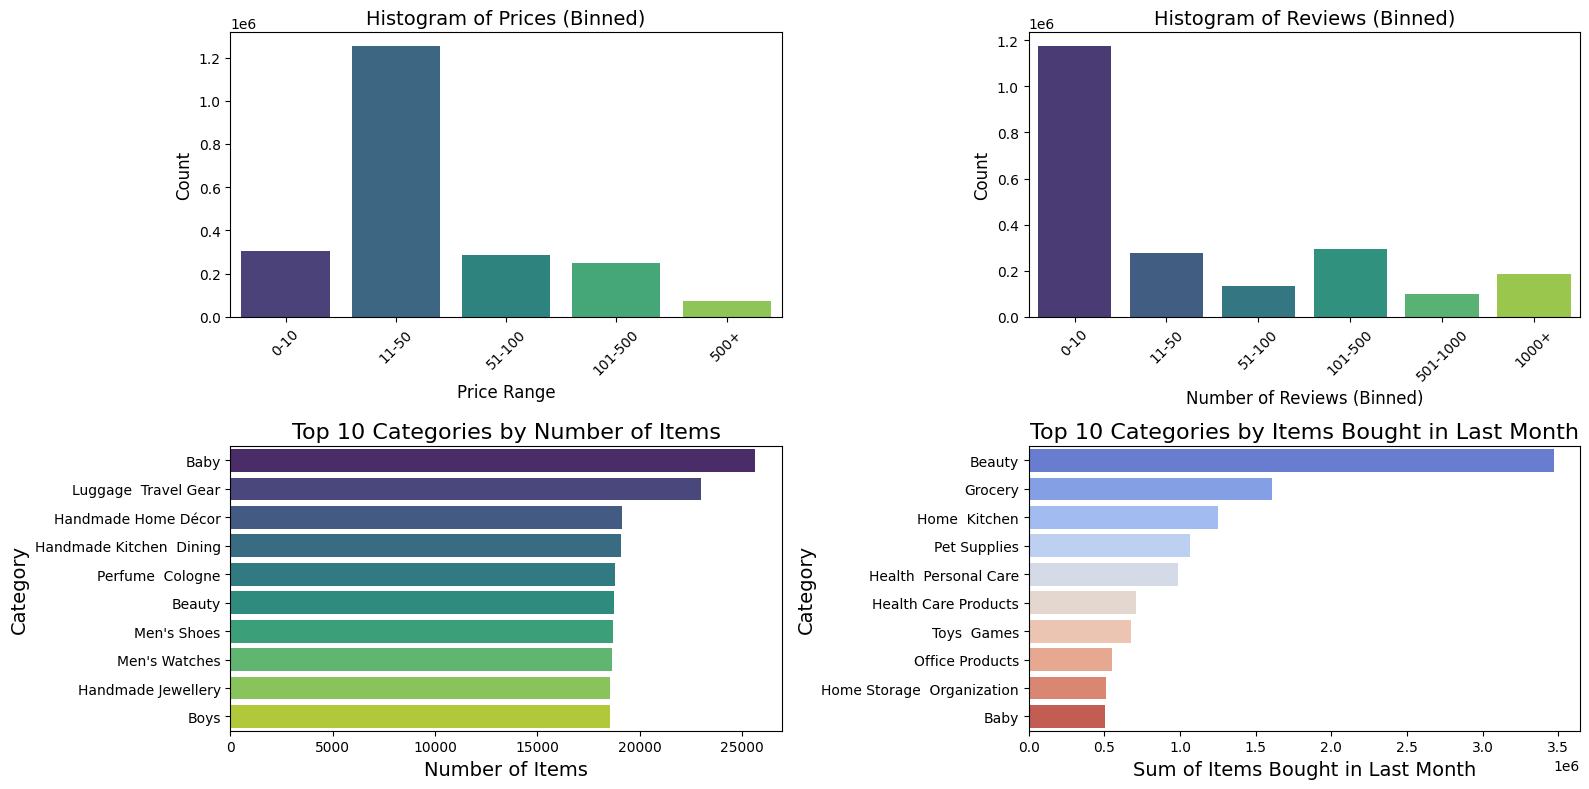

In [ ]:
# @title Plots
# --- Function to bin a column and plot ---
def plot_binned_histogram(df, column, bins, labels, title, x_label):
    binned_col = f"{column}_binned"
    df_data[binned_col] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)

    # Plot histogram
    # plt.figure(figsize=(10, 6))
    plot = sns.countplot(data=df, x=binned_col, palette='viridis')
    plot.set_title(title, fontsize=14)
    plot.set_xlabel(x_label, fontsize=12)
    plot.set_ylabel("Count", fontsize=12)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
    return plot

# --- Binning 'price'---
price_bins = [0, 10, 50, 100, 500, df_data['price'].max()]
price_labels = ['0-10', '11-50', '51-100', '101-500', '500+']

reviews_bins = [0, 10, 50, 100, 500, 1000, df_data['reviews'].max()]
reviews_labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1000+']

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)  # (rows, columns, position)
plot_binned_histogram(
    df_data,
    column='price',
    bins=price_bins,
    labels=price_labels,
    title="Histogram of Prices (Binned)",
    x_label="Price Range"
)

plt.subplot(2, 2, 2)
plot_binned_histogram(
    df_data,
    column='reviews',
    bins=reviews_bins,
    labels=reviews_labels,
    title="Histogram of Reviews (Binned)",
    x_label="Number of Reviews (Binned)"
)

# --- Count the number of items per category ---
category_counts = df_data['categoryName'].value_counts()

plt.subplot(2, 2, 3)
sns.barplot(
    x=category_counts.values[:10],
    y=category_counts.index[:10],
    palette="viridis"
)
plt.title("Top 10 Categories by Number of Items", fontsize=16)
plt.xlabel("Number of Items", fontsize=14)
plt.ylabel("Category", fontsize=14)

# --- Group by 'categoryName' and calculate the sum of 'boughtInLastMonth' ---
bought_sum = df_data.groupby('categoryName')['boughtInLastMonth'].sum().sort_values(ascending=False)

# --- Plot the top 10 categories by sum of 'boughtInLastMonth' ---
plt.subplot(2, 2, 4)
sns.barplot(
    x=bought_sum.values[:10],
    y=bought_sum.index[:10],
    palette="coolwarm"
)
plt.title("Top 10 Categories by Items Bought in Last Month", fontsize=16)
plt.xlabel("Sum of Items Bought in Last Month", fontsize=14)
plt.ylabel("Category", fontsize=14)

plt.tight_layout()
plt.show()


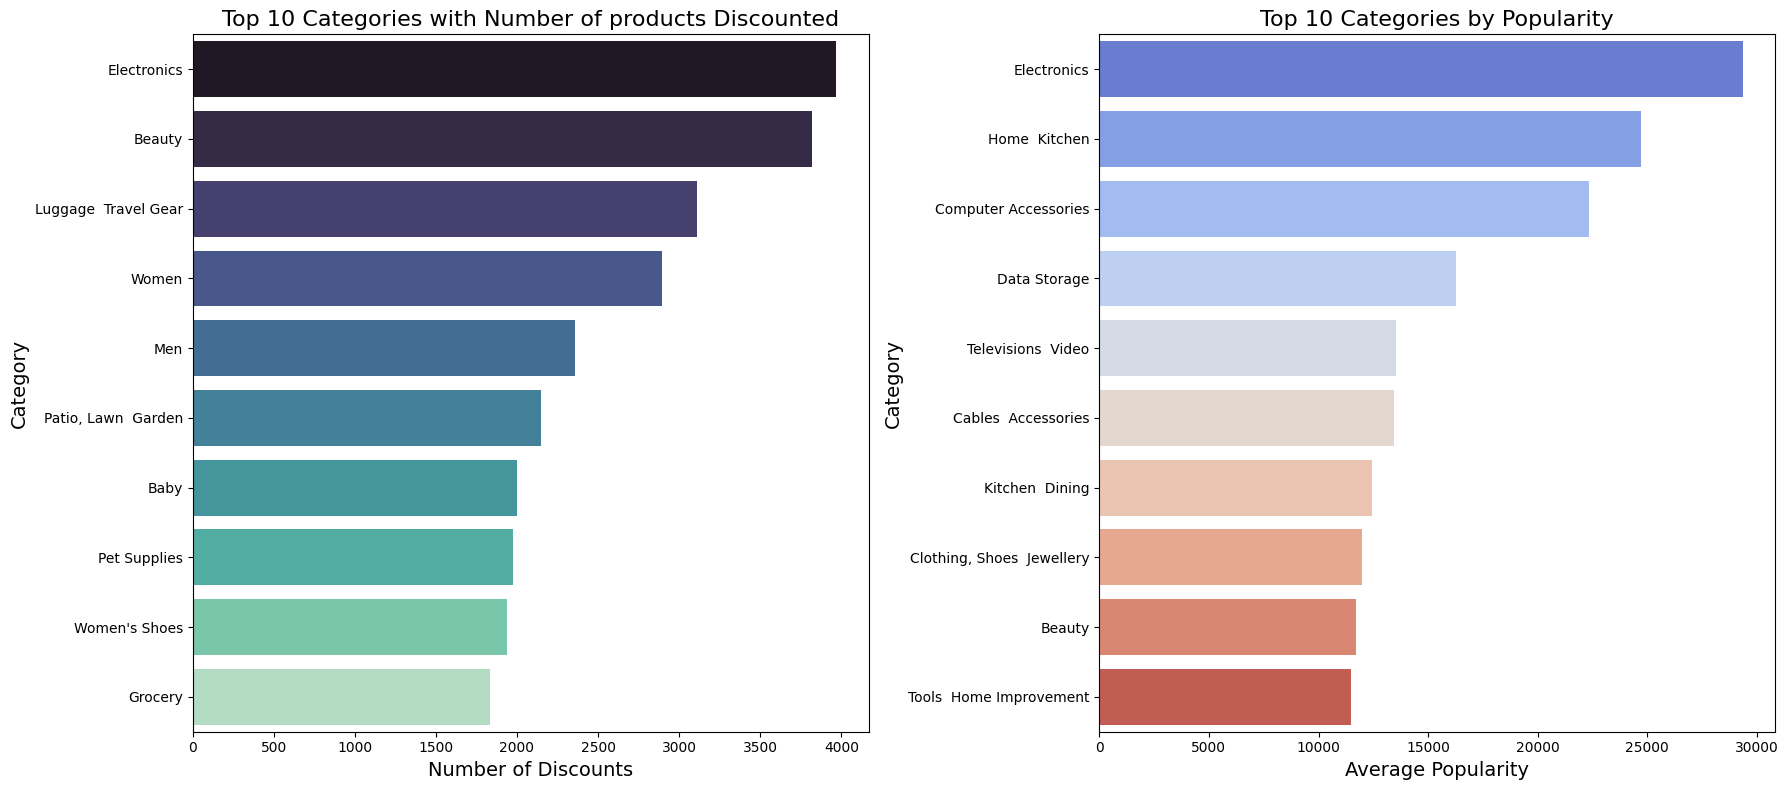

In [ ]:
# @title More Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to identify discounted products
df_data['has_discount'] = df_data['listPrice'] > df_data['price']

# Group by 'categoryName' and count the number of discounts
discount_counts = df_data[df_data['has_discount']].groupby('categoryName').size().sort_values(ascending=False)

# Calculate Popularity
df_data['popularity'] = df_data['reviews'] * df_data['stars']
popularity_by_category = df_data.groupby('categoryName')['popularity'].mean().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top 10 Categories by Number of Discounts
sns.barplot(
    x=discount_counts.values[:10],
    y=discount_counts.index[:10],
    palette="mako",
    ax=axes[0]
)
axes[0].set_title("Top 10 Categories with Number of products Discounted", fontsize=16)
axes[0].set_xlabel("Number of Discounts", fontsize=14)
axes[0].set_ylabel("Category", fontsize=14)

# Top 10 Categories by Popularity
sns.barplot(
    x=popularity_by_category.values,
    y=popularity_by_category.index,
    palette="coolwarm",
    ax=axes[1]
)
axes[1].set_title("Top 10 Categories by Popularity", fontsize=16)
axes[1].set_xlabel("Average Popularity", fontsize=14)
axes[1].set_ylabel("Category", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


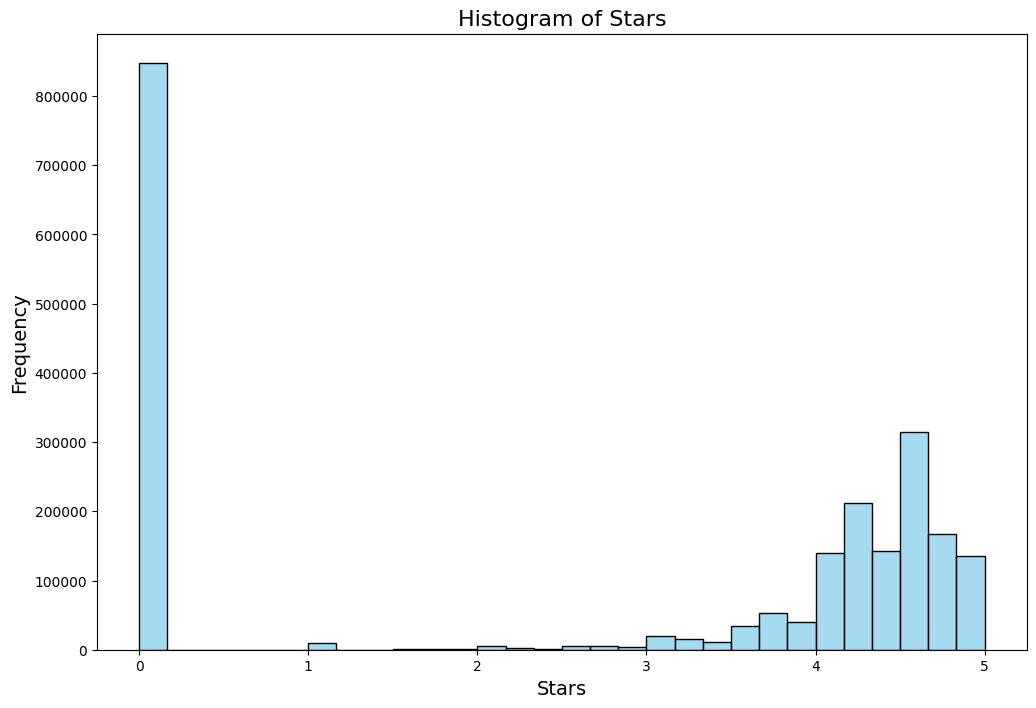

In [ ]:
# @title Star Hist
# Plot histogram for 'stars' column
plt.figure(figsize=(12, 8))
sns.histplot(data=df_data, x='stars', kde=False, bins=30, color='skyblue')
plt.title("Histogram of Stars", fontsize=16)
plt.xlabel("Stars", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


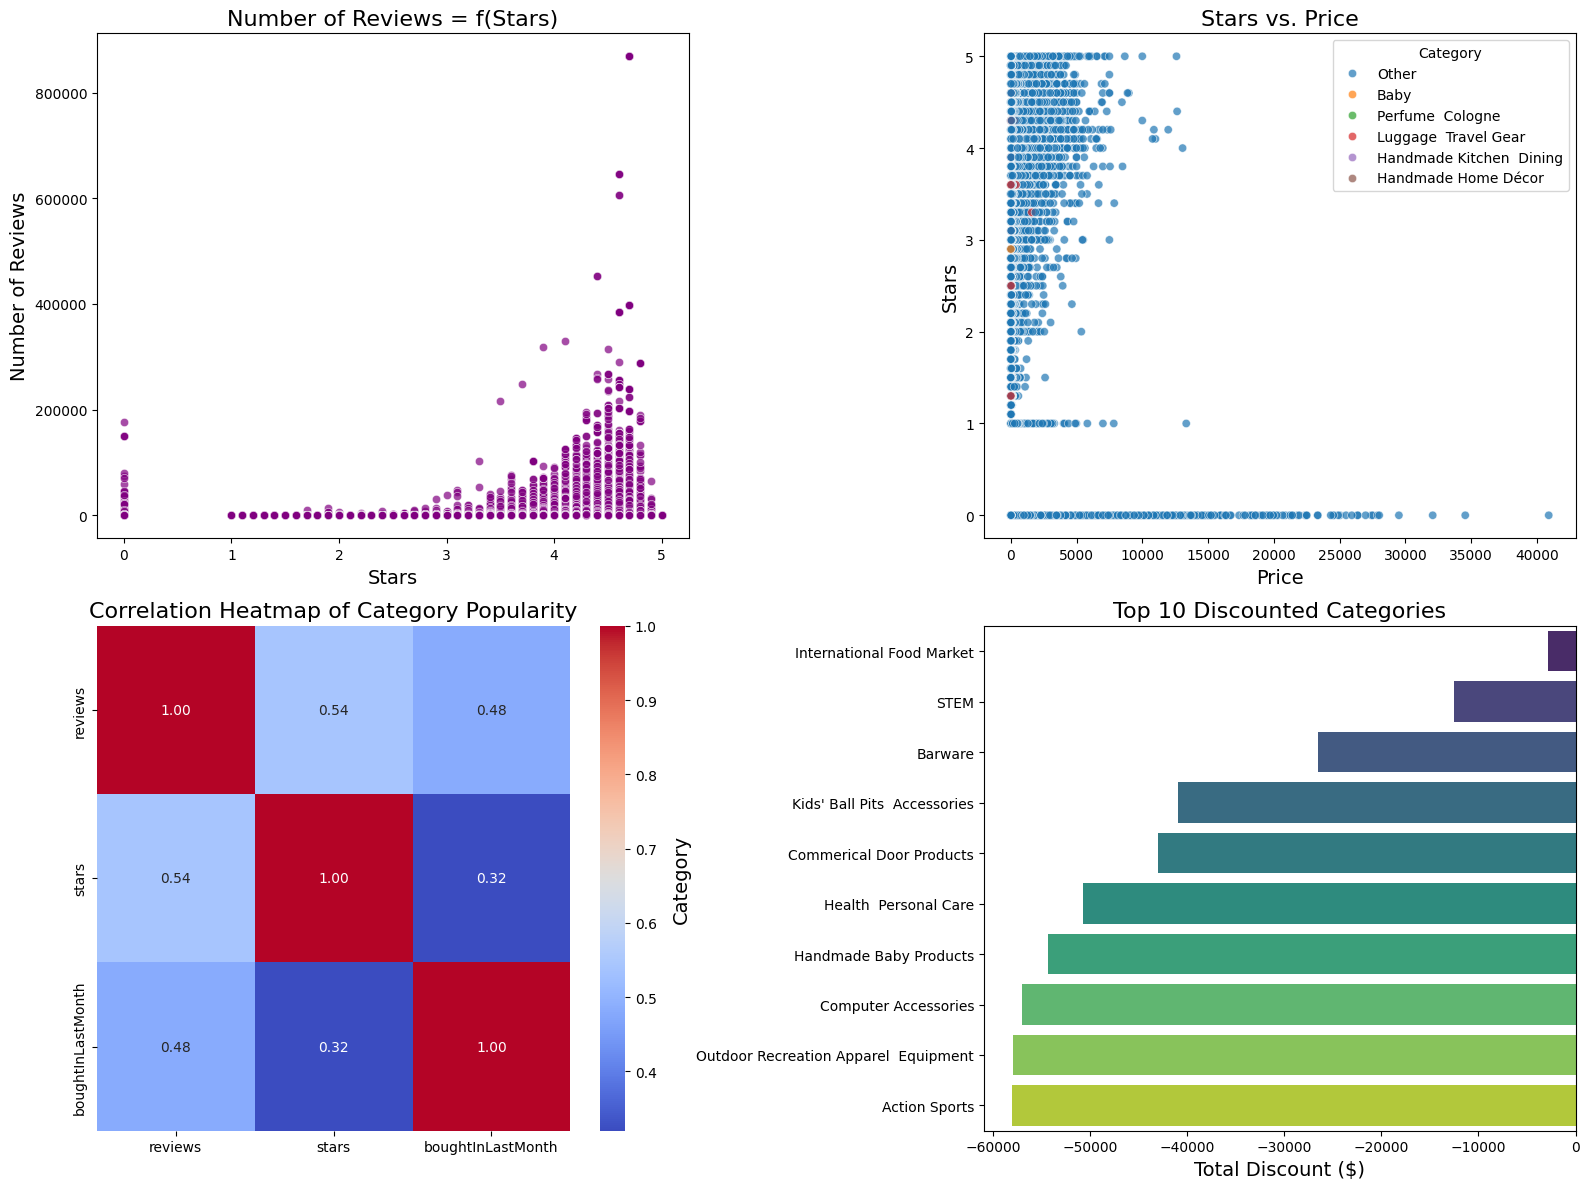

In [ ]:
# @title More Plots II
# --- Filter top 5 categories for the legend in Stars vs. Price ---
top_5_categories = df_data['categoryName'].value_counts().head(5).index
df_data['category_filtered'] = df_data['categoryName'].apply(
    lambda x: x if x in top_5_categories else 'Other'
)

# --- Create subplots ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# --- Number of Reviews = f(Stars) ---
sns.scatterplot(data=df_data, x='stars', y='reviews', alpha=0.7, color='purple', ax=axes[0, 0])
axes[0, 0].set_title("Number of Reviews = f(Stars)", fontsize=16)
axes[0, 0].set_xlabel("Stars", fontsize=14)
axes[0, 0].set_ylabel("Number of Reviews", fontsize=14)

# --- Stars vs. Price with filtered categories ---
sns.scatterplot(
    data=df_data, x='price', y='stars', hue='category_filtered', alpha=0.7, ax=axes[0, 1]
)
axes[0, 1].set_title("Stars vs. Price", fontsize=16)
axes[0, 1].set_xlabel("Price", fontsize=14)
axes[0, 1].set_ylabel("Stars", fontsize=14)
axes[0, 1].legend(title="Category", loc="upper right", ncol=1)

# --- Correlation Heatmap of Category Popularity ---
category_popularity = df_data.groupby('categoryName')[['reviews', 'stars', 'boughtInLastMonth']].sum()
sns.heatmap(
    category_popularity.corr(), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1, 0]
)
axes[1, 0].set_title("Correlation Heatmap of Category Popularity", fontsize=16)

# --- Top 10 Discounted Categories ---
df_data['discount'] = df_data['listPrice'] - df_data['price']
discounts_by_category = df_data.groupby('categoryName')['discount'].sum().sort_values(ascending=False).head(10)
sns.barplot(
    x=discounts_by_category.values, y=discounts_by_category.index, palette='viridis', ax=axes[1, 1]
)
axes[1, 1].set_title("Top 10 Discounted Categories", fontsize=16)
axes[1, 1].set_xlabel("Total Discount ($)", fontsize=14)
axes[1, 1].set_ylabel("Category", fontsize=14)

# --- Adjust layout ---
plt.tight_layout()
plt.show()


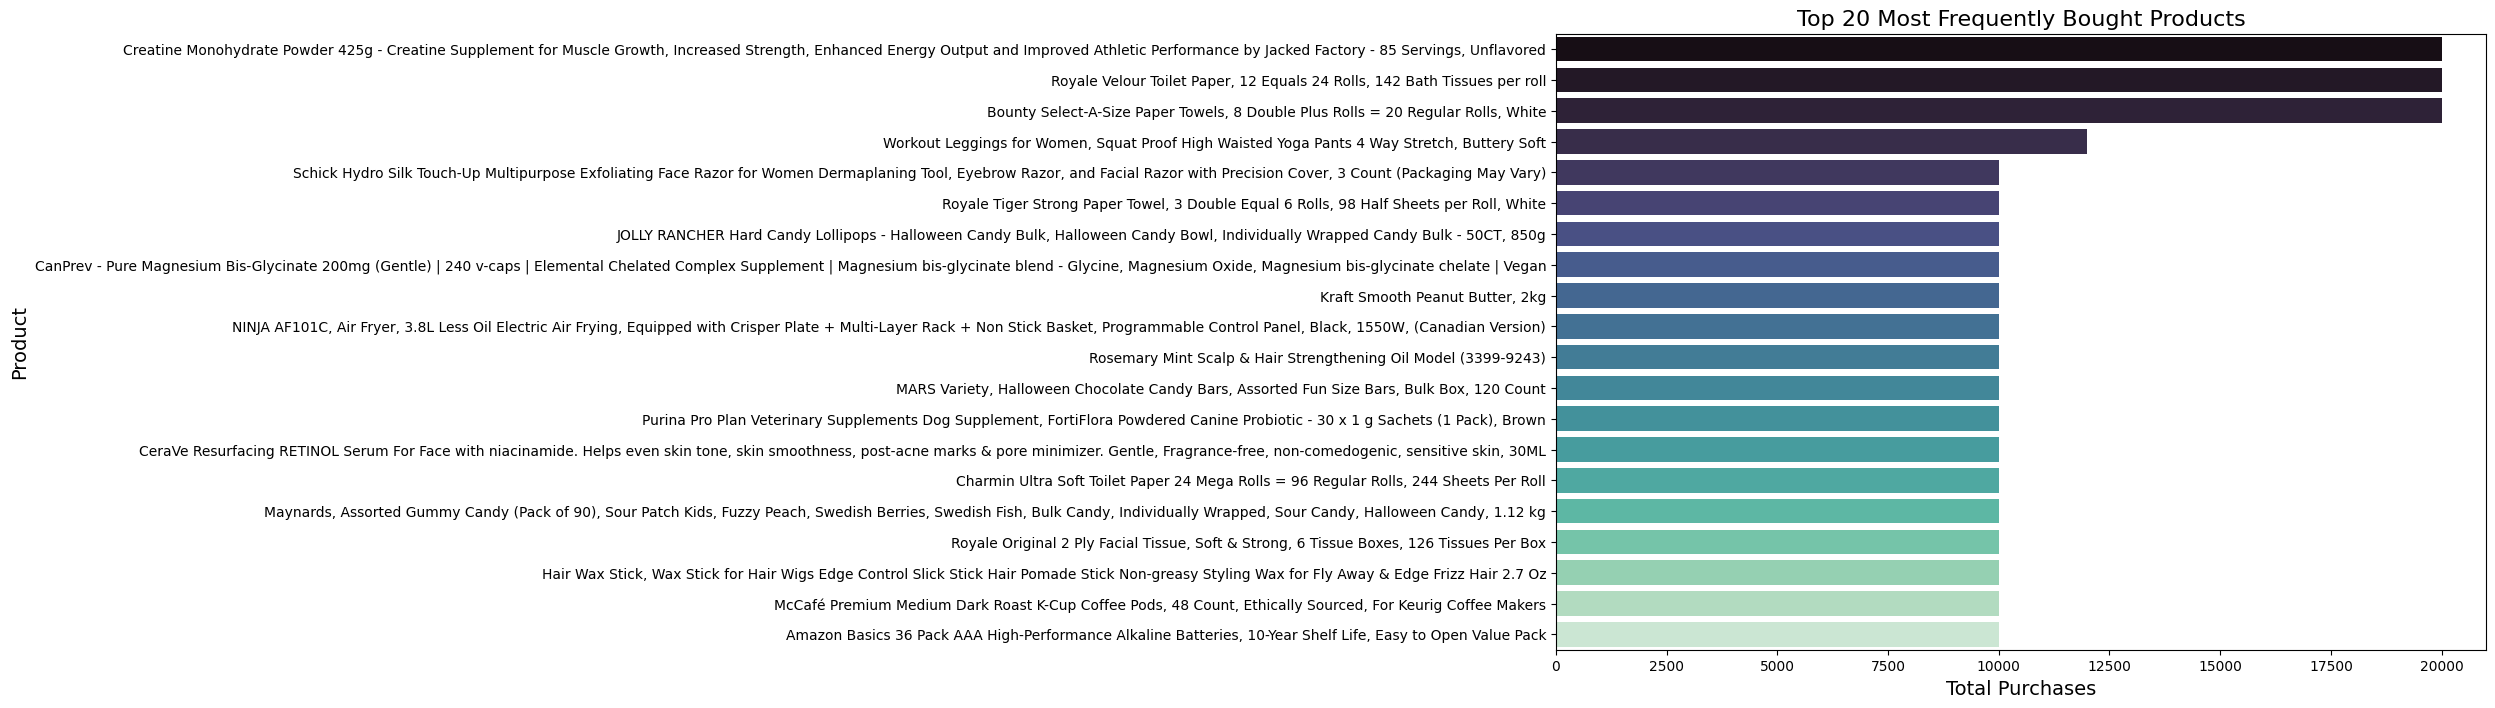

In [ ]:
# @title Bar Plot
product_frequency = df_data.groupby('title')['boughtInLastMonth'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=product_frequency.values, y=product_frequency.index, palette="mako")
plt.title("Top 20 Most Frequently Bought Products", fontsize=16)
plt.xlabel("Total Purchases", fontsize=14)
plt.ylabel("Product", fontsize=14)
plt.show()


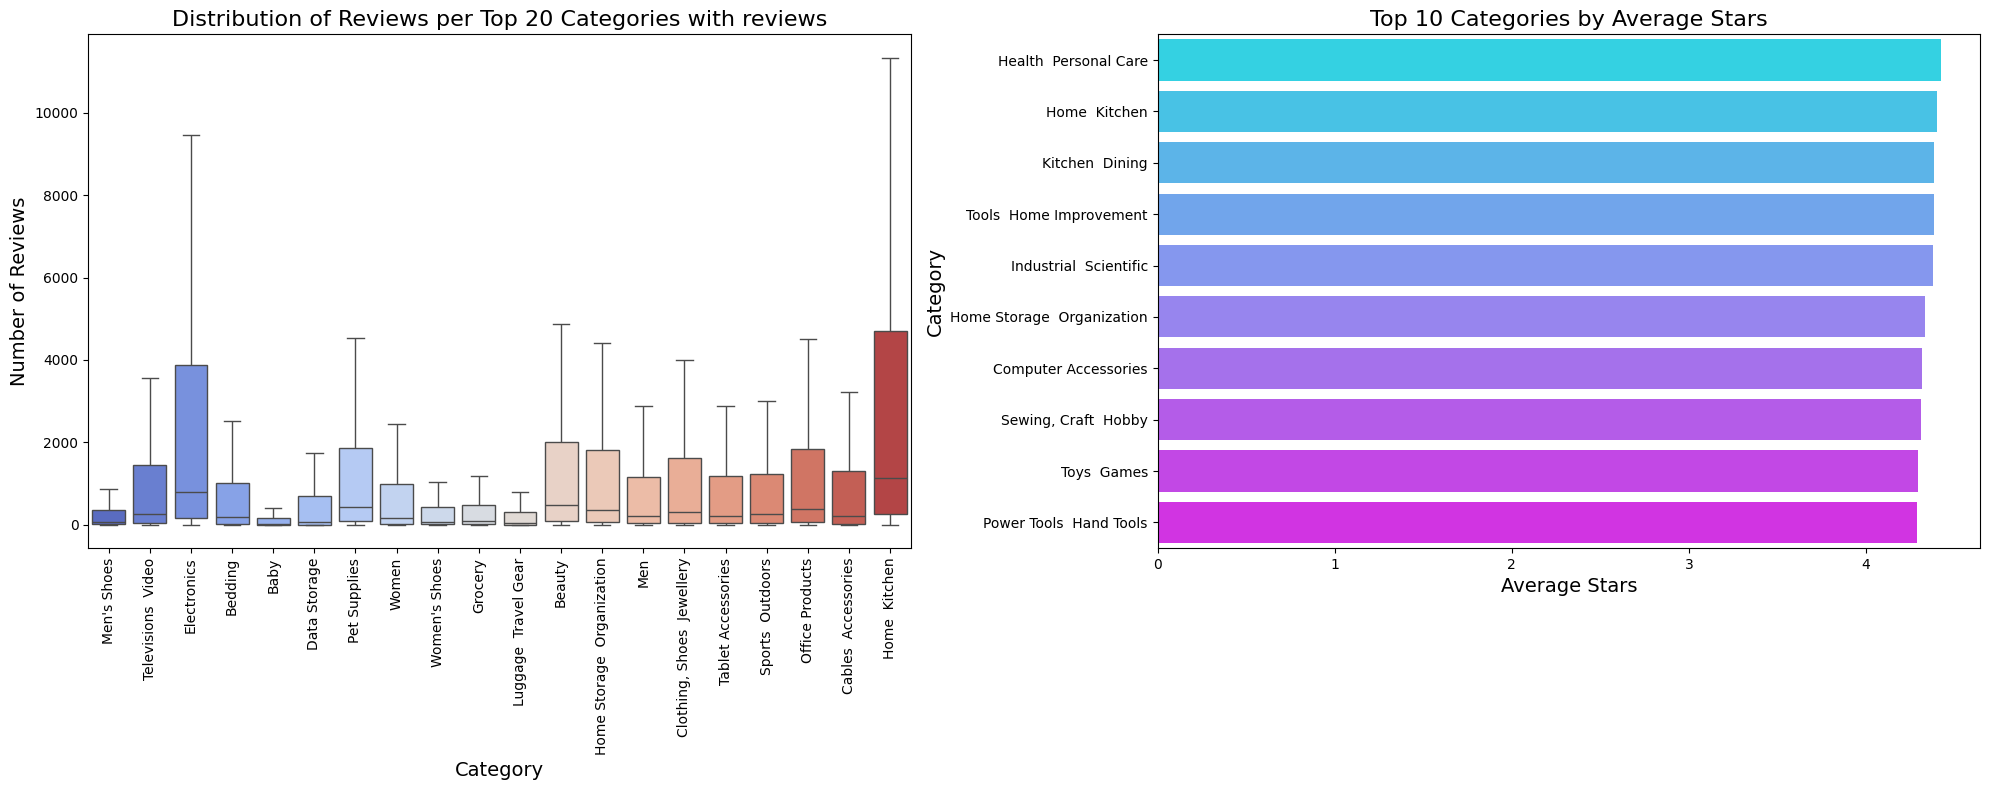

In [ ]:
# @title Plots
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter top 20 categories with the most reviews ---
top_20_review_categories = df_data.groupby('categoryName')['reviews'].sum().sort_values(ascending=False).head(20).index
df_top_reviews = df_data[df_data['categoryName'].isin(top_20_review_categories)]

# --- Calculate average stars by category for the second plot ---
avg_stars_by_category = df_data.groupby('categoryName')['stars'].mean().sort_values(ascending=False).head(10)

# --- Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# --- Distribution of Reviews per Top 20 Categories ---
sns.boxplot(
    data=df_top_reviews,
    x='categoryName',
    y='reviews',
    palette="coolwarm",
    showfliers=False,
    ax=axes[0]
)
axes[0].set_title("Distribution of Reviews per Top 20 Categories with reviews", fontsize=16)
axes[0].set_xlabel("Category", fontsize=14)
axes[0].set_ylabel("Number of Reviews", fontsize=14)
axes[0].tick_params(axis='x', rotation=90)

# --- Top 10 Categories by Average Stars ---
sns.barplot(
    x=avg_stars_by_category.values,
    y=avg_stars_by_category.index,
    palette="cool",
    ax=axes[1]
)
axes[1].set_title("Top 10 Categories by Average Stars", fontsize=16)
axes[1].set_xlabel("Average Stars", fontsize=14)
axes[1].set_ylabel("Category", fontsize=14)

# --- Adjust layout ---
plt.tight_layout()
plt.show()


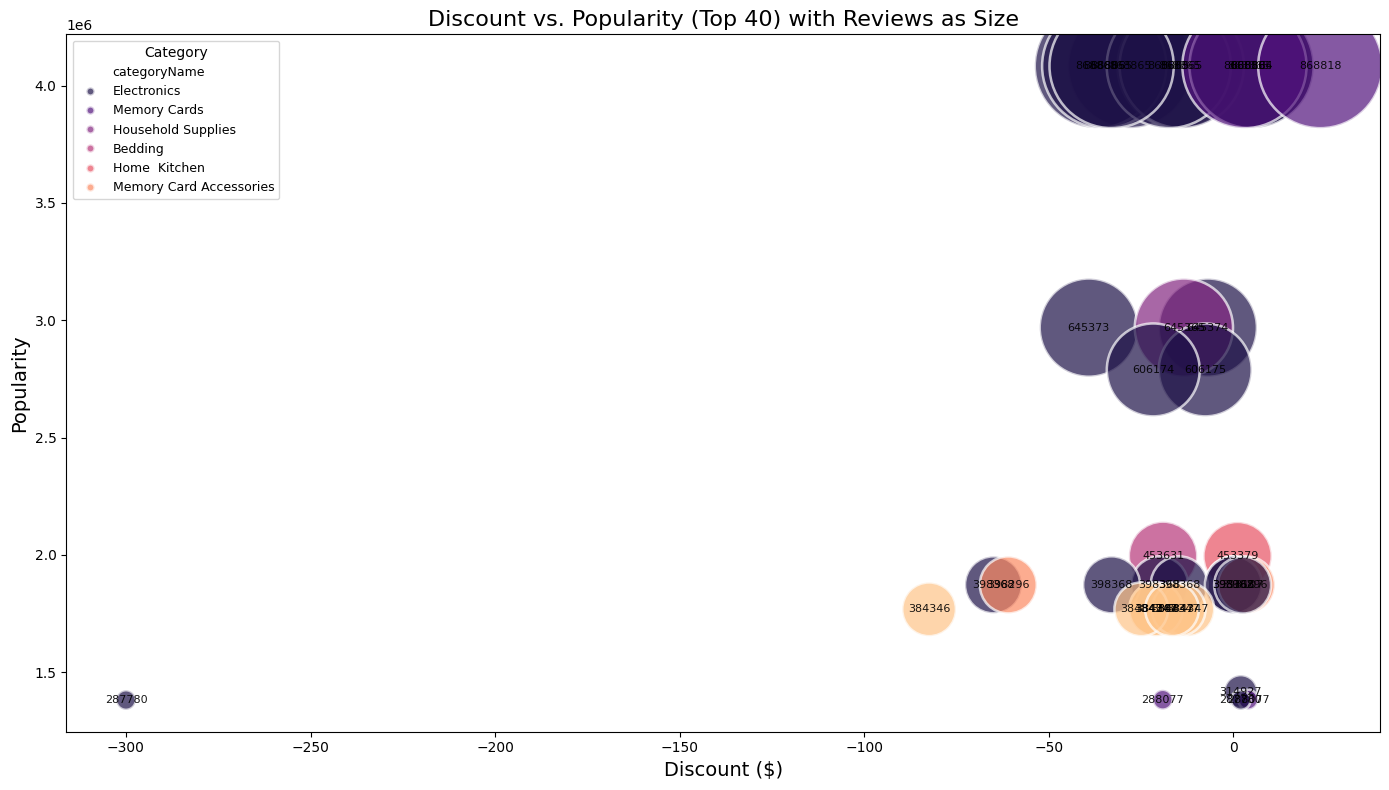

In [ ]:
# @title Bubble plots

# --- Sort the DataFrame by popularity in descending order ---
df_data_sorted = df_data.sort_values(by='popularity', ascending=False)

# --- Select the top 40 most popular points ---
df_top_40 = df_data_sorted.head(40)

# --- Create the scatter plot with size as the number of reviews ---
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=df_top_40,
    x='discount',
    y='popularity',
    hue='categoryName',
    size='reviews',           # Size based on the number of reviews
    sizes=(200, 8000),         # Adjust size range
    alpha=0.7,
    palette='magma'
)

# --- Add labels inside each circle ---
for i, row in df_top_40.iterrows():
    plt.text(
        row['discount'],
        row['popularity'],
        str(row['reviews']),    # Label is the number of reviews
        fontsize=8,
        ha='center',
        va='center',
        color='black',
        alpha=0.9
    )

# --- Title and axis labels ---
plt.title("Discount vs. Popularity (Top 40) with Reviews as Size", fontsize=16)
plt.xlabel("Discount ($)", fontsize=14)
plt.ylabel("Popularity", fontsize=14)

# --- Adjust legend to include all categories ---
handles, labels = scatter.get_legend_handles_labels()

plt.legend(
    handles=handles[:len(df_top_40['categoryName'].unique())],
    labels=labels,
    title="Category",
    loc="upper left",
    fontsize=9,
    title_fontsize=10
)

# --- Adjust layout and display ---
plt.tight_layout()
plt.show()


## Additional Plots

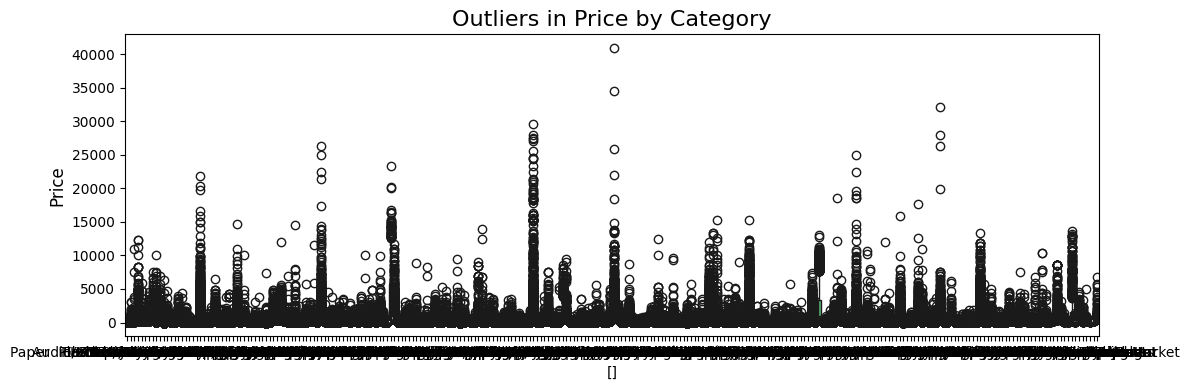

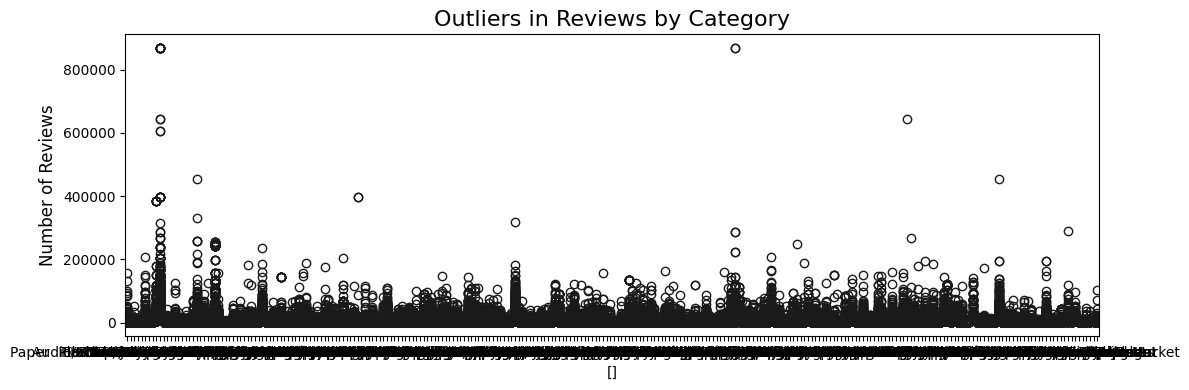

In [ ]:
# @title Outlier Detection Plots
import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplot for Price ---
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_data, x='categoryName', y='price', palette="viridis")
plt.title("Outliers in Price by Category", fontsize=16)
plt.xlabel([])
plt.ylabel("Price", fontsize=12)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Boxplot for Reviews ---
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_data, x='categoryName', y='reviews', palette="viridis")
plt.title("Outliers in Reviews by Category", fontsize=16)
plt.xlabel([])
plt.ylabel("Number of Reviews", fontsize=12)
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


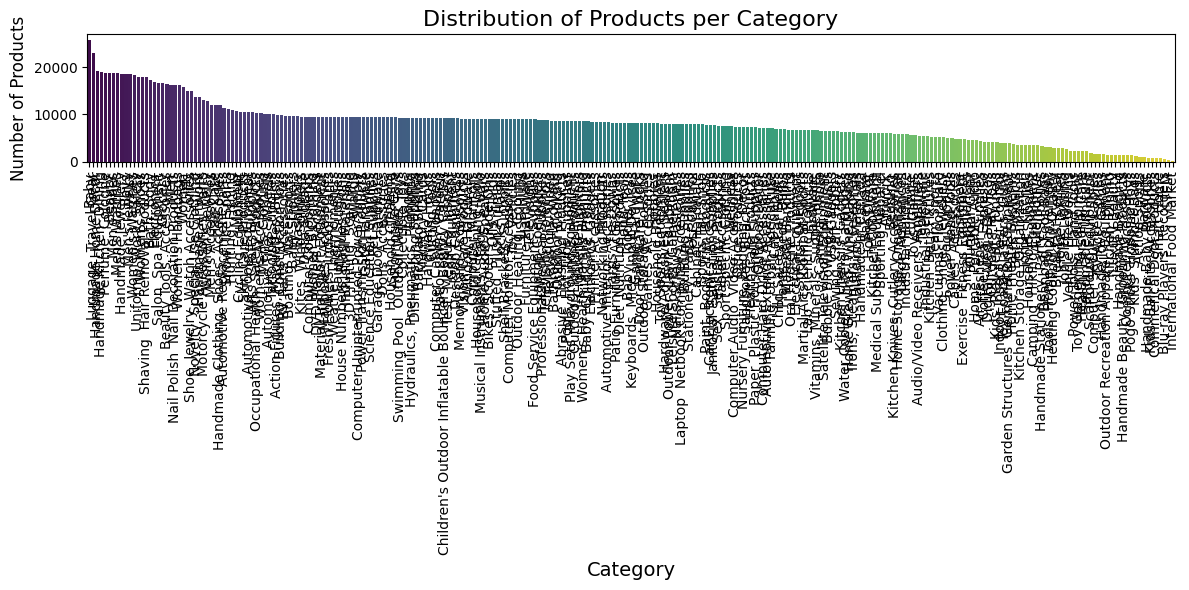

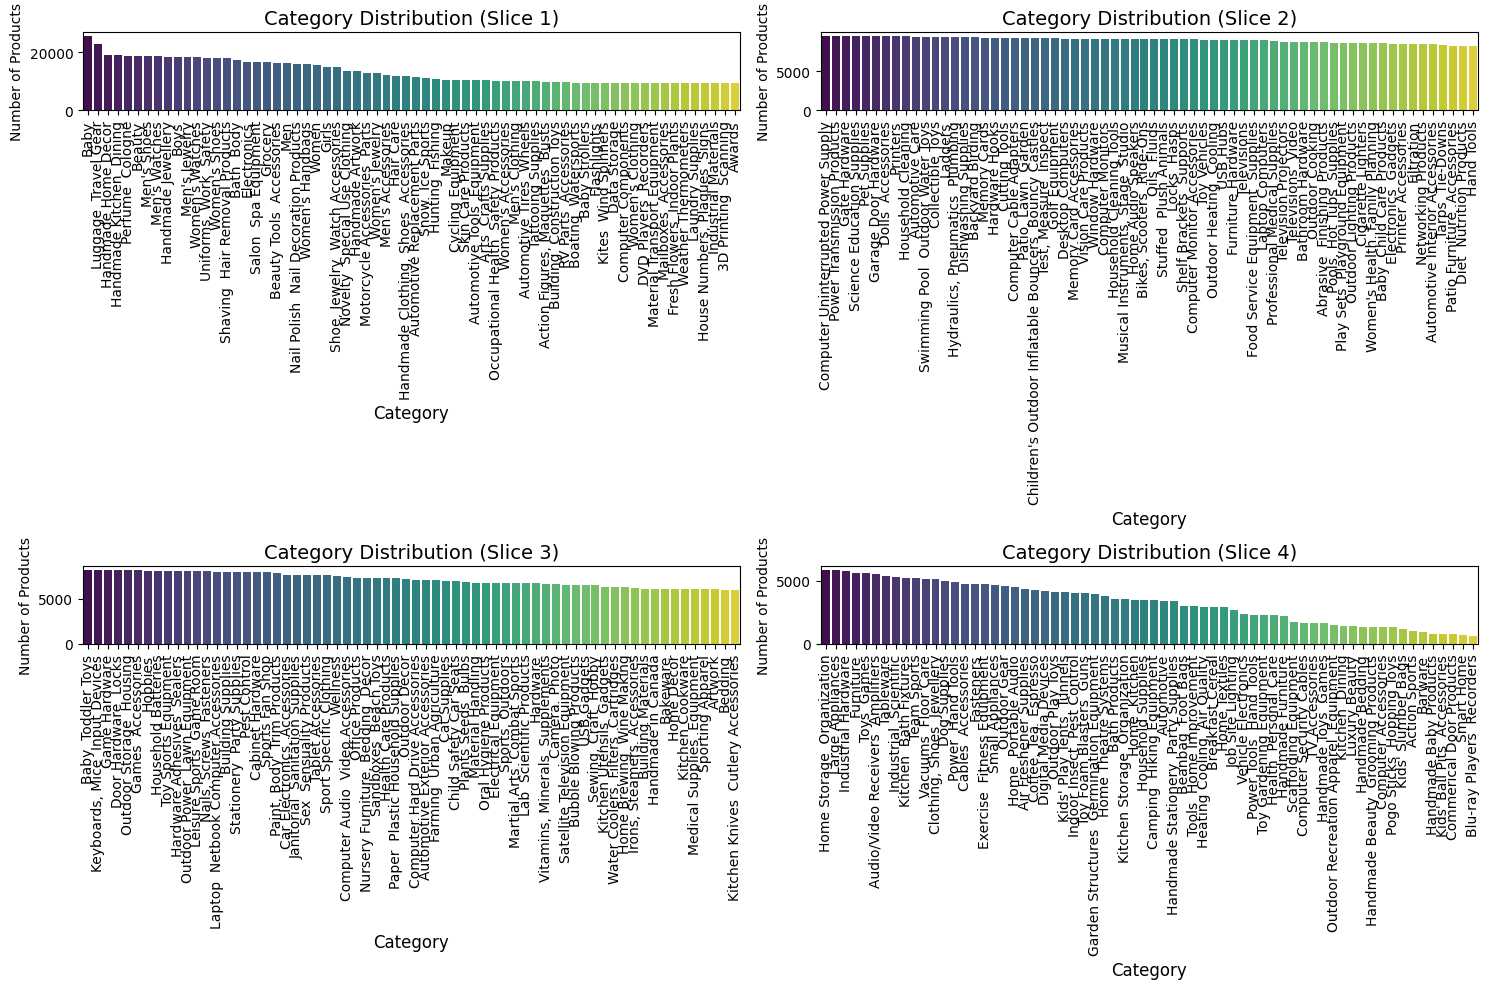

In [ ]:
# @title Distribution of nbr of product =f(categories)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Products per Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Products", fontsize=12) # Reduced font size for y-label
plt.xticks(rotation=90)
plt.tight_layout()

# Calculate the number of items per slice
slice_size = len(category_counts) // 4

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) # Adjust figsize as necessary

for i in range(4):
    start_index = i * slice_size
    end_index = min((i + 1) * slice_size, len(category_counts))
    slice_data = category_counts[start_index:end_index]

    row = i // 2
    col = i % 2

    sns.barplot(ax=axes[row, col], x=slice_data.index, y=slice_data.values, palette="viridis")
    axes[row, col].set_title(f"Category Distribution (Slice {i+1})", fontsize=14)
    axes[row, col].set_xlabel("Category", fontsize=12)
    axes[row, col].set_ylabel("Number of Products", fontsize=10) #Reduced font size for y-label
    axes[row, col].tick_params(axis='x', rotation=90)
    plt.tight_layout()

plt.show()

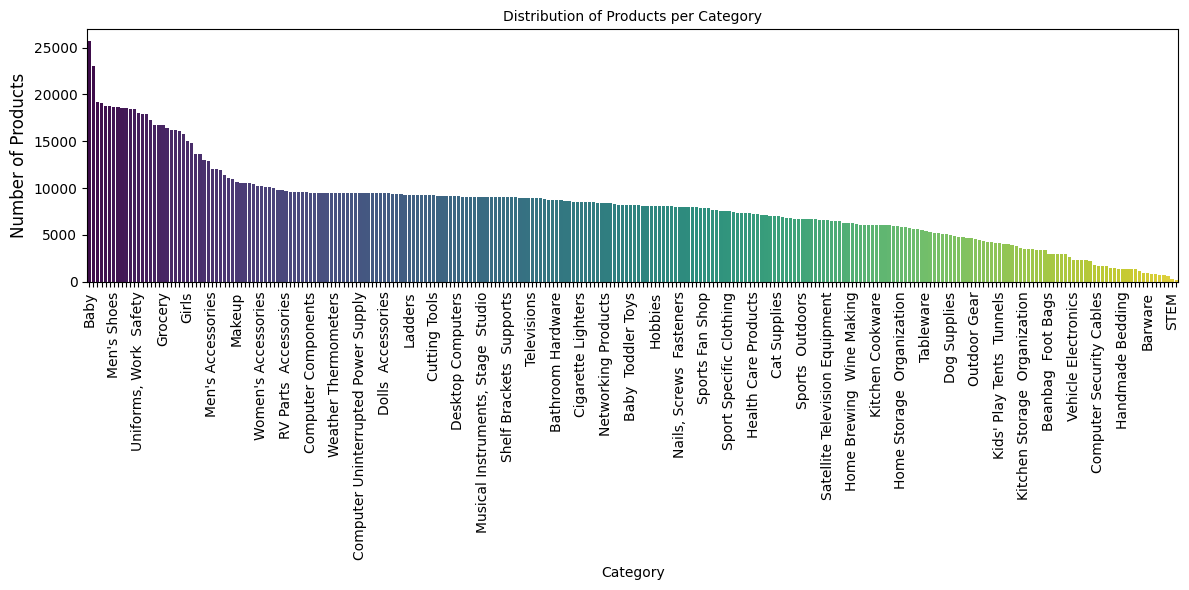

In [ ]:
# @title Distribution of Number of Products by Category
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Remove more x-tick labels by displaying only every 4th label
xticks = plt.gca().get_xticks()
xtick_labels = [label if i % 6 == 0 else "" for i, label in enumerate(category_counts.index)]
plt.gca().set_xticklabels(xtick_labels)

plt.title("Distribution of Products per Category", fontsize=10)
plt.xlabel("Category", fontsize=10)
plt.ylabel("Number of Products", fontsize=12)
plt.xticks(rotation=90)  # Slight rotation for better spacing
plt.tight_layout()


## Feature Eng

In [ ]:
data = df_data.copy()

# --- Memory optimization ---
data['price'] = pd.to_numeric(data['price'], downcast='float')
data['stars'] = pd.to_numeric(data['stars'], downcast='float')
data['listPrice'] = pd.to_numeric(data['listPrice'], downcast='float')
data['reviews'] = pd.to_numeric(data['reviews'], downcast='float')

# --- NEW FEATURES ---
# Discount and discount percentage
data['discount'] = data['listPrice'] - data['price']
data['discount_percentage'] = (data['discount'] / data['listPrice']).replace([np.inf, -np.inf], 0).fillna(0) * 100

# Title length
data['title_length'] = data['title'].fillna("").apply(len)

# Reviews per star
data['reviews_per_star'] = data['reviews'] / (data['stars'] + 1e-6)
data['reviews_per_star'] = data['reviews_per_star'].replace([np.inf, -np.inf], 0)

# Discount and Reviews_per_stars interactions
data['discount_and_stars'] = data['discount'] * data['stars']

# Discount and title length interactions?
data['discount_and_title_length'] = data['discount'] * data['title_length']

# Discount and reviews interactions?
data['discount_and_reviews'] = data['discount'] * data['reviews']

# High-rated binary column
data['high_rated'] = (data['stars'] >= 4).astype(int)

# Popularity score
data['popularity'] = data['reviews'] * data['stars']

# Encoding categoryName (Label Encoding)
data['category_encoded'] = data['categoryName'].astype('category').cat.codes

# Create price range bins
price_range_bins = pd.cut(data['price'], bins=[0, 50, 100, 200, float('inf')], labels=['0-50', '51-100', '101-200', '200+'],  include_lowest=True)
data['price_range_bins'] = price_range_bins

# Summary of new features
data.head()

asin                                              title  \
1064924  B0014JTAA2  Seventh Generation Drawstrng Kitchen Bag 13 Ga...   
1734235  B0CG2K84DQ  BESPORTBLE Fishing baits Lures Kit Bionic Lure...   
1650301  B0C5QMLPFY  Ladies Smart Watch Full Touch Fitness Watch Tr...   
1463834  B0BN9M8ZS1                   MacQuarrie Scottish Clan History   
1923192  B0CC6V6PKX  Indoor/Outdoor Incandescent Round Rope Light -...   

                                                    imgUrl  \
1064924  https://m.media-amazon.com/images/I/81kggdVxfX...   
1734235  https://m.media-amazon.com/images/I/61LgKQyVwf...   
1650301  https://m.media-amazon.com/images/I/81Pgoquv3Z...   
1463834  https://m.media-amazon.com/images/I/916QaVVBQt...   
1923192  https://m.media-amazon.com/images/I/51y-6Zg1mo...   

                                  productURL  stars  reviews   price  \
1064924  https://www.amazon.ca/dp/B0014JTAA2    4.5    821.0   23.73   
1734235  https://www.amazon.ca/dp/B0CG2K84DQ    0.0      0.0    0.00   
1650301  https://www.amazon.ca/dp/B0C5QMLPFY    0.0      0.0  557.32   
1463834  https://www.amazon.ca/dp/B0BN9M8ZS1    0.0      0.0   12.98   
1923192  https://www.amazon.ca/dp/B0CC6V6PKX    0.0      0.0   71.13   

         listPrice                       categoryName  isBestSeller  ...  \
1064924        0.0  Paper  Plastic Household Supplies         False  ...   
1734235        0.0                       Pest Control         False  ...   
1650301        0.0               Electronics  Gadgets         False  ...   
1463834        0.0                   Handmade Artwork         False  ...   
1923192        0.0                   Tarps  Tie-Downs         False  ...   

         discount_percentage  title_length  reviews_per_star  \
1064924                  0.0            57        182.444412   
1734235                  0.0            80          0.000000   
1650301                  0.0           176          0.000000   
1463834                  0.0            32          0.000000   
1923192                  0.0            57          0.000000   

         discount_and_stars  discount_and_title_length  discount_and_reviews  \
1064924            -106.785                   -1352.61             -19482.33   
1734235               0.000                       0.00                  0.00   
1650301              -0.000                  -98088.32                 -0.00   
1463834              -0.000                    -415.36                 -0.00   
1923192              -0.000                   -4054.41                 -0.00   

         high_rated  popularity  category_encoded  price_range_bins  
1064924           1      3694.5               192              0-50  
1734235           0         0.0               196              0-50  
1650301           0         0.0                74              200+  
1463834           0         0.0                94              0-50  
1923192           0         0.0               234            51-100  

[5 rows x 22 columns]

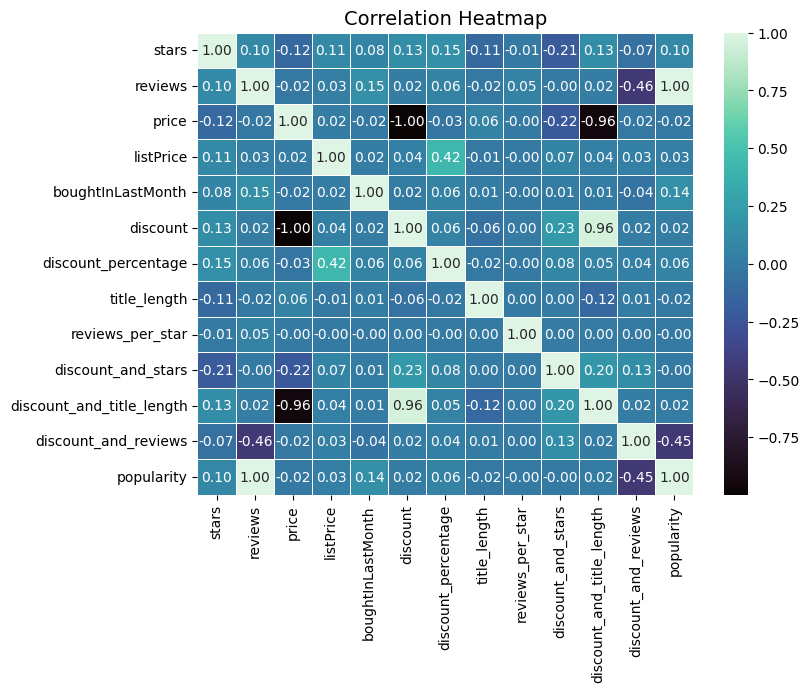

In [ ]:
# @title Correlation Matrix

columns_to_exclude = ['asin', 'title', 'imgUrl', 'productURL', 'categoryName', 'isBestSeller', 'high_rated', 'category_encoded', 'price_range_bins']
numerical_cols = [col for col in data.columns if col not in columns_to_exclude]

plt.figure(figsize=(8, 6))
corr = data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap="mako", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [ ]:
# # Feature engineering and assumption:

# Removing redundant feature following correlation matrix
data = data.drop(columns=['discount', 'discount_and_title_length'])

# # --- Business Assumptions ---
# # Do we want to suggest products with 0 stars and 0 reviews?
# # I personally don't think and we should keep these products from the dataset, hence the recommendations

# # Excluding where we have strictly less than 3 stars and where we have less than 30 reviews
data = data[(data['stars'] >= 3) & (data['reviews'] > 20)]
print("shape after excluding items with 1 stars and less than 5 reviews: ", data.shape)

data = data[(data['reviews_per_star'] >= 20)  ] # & (data['reviews'] > 50)
print("reviews per star >= 20: ", data.shape)

data = data[(data['discount_percentage'] <= 20)  ] # & (data['reviews'] > 50)
print("discount_percentage <= 20: ", data.shape)

shape after excluding items with 1 stars and less than 5 reviews:  (351304, 20)
reviews per star >= 20:  (242715, 20)
discount_percentage <= 20:  (231046, 20)


In [ ]:
# data2 = data[(data['discount_percentage'] <= 20)  ] # & (data['reviews'] > 50)
# print("shape after excluding items with 1 stars and less than 5 reviews: ", data2.shape)

In [ ]:
# @title Preprocessing pipeline
# Text Preprocessing pipeline
# --- Handles missin vals, convert to lowercase, remove special characters and tokenize the text ---
line_counter = 0
def preprocess_text(text, counter_step=50000):
    """
    Preprocesses a given text by performing the following steps:
    - Converts text to lowercase.
    - Removes special characters and punctuation.
    - Tokenizes the text into words.
    - Removes stopwords.
    - Applies lemmatization to each word.
    - Handles NaN values by returning an empty string.

    Additionally, tracks the number of processed lines with `counter_step` lines

    Args:
        text (str or float): The input text to preprocess. Can handle NaN values as floats.
        counter_step (int): Number of lines to process before printing a progress update. Default is 50,000.

    Returns:
        str: The cleaned and preprocessed text as a single string.
    """
    global line_counter

    # stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    if isinstance(text, float) and np.isnan(text):
        return ""  # Handle NaN values in text columns
    text = text.lower()
    # Removed the punctuation removal for BERT. We must keep it
    # text = re.sub(r'[^\w\s]', '', text) # Remove Punctuation
    tokens = text.split() # tokenize the text
    # tokens = [stemmer.stem(word) for word in tokens if word not in stop_words] # stemmer isn't the best choice. leammatizer is.
    # tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Each word reduced to its based form eg: running -> run

    # Increment the counter
    line_counter += 1

    # Print update every counter_step lines
    if line_counter % counter_step == 0:
        print(f"Processed {line_counter} lines...")

    return ' '.join(tokens) # one final single string created

data['title'] = data['title'].apply(preprocess_text)
data['categoryName'] = data['categoryName'].apply(preprocess_text)



Processed 50000 lines...
Processed 100000 lines...
Processed 150000 lines...
Processed 200000 lines...
Processed 250000 lines...
Processed 300000 lines...
Processed 350000 lines...
Processed 400000 lines...
Processed 450000 lines...


In [ ]:
# # @title Num Features, StandardScaler and NaNs
# # --- Numerical features used for the modelS ---
# numerical_features = ['price', 'listPrice', 'reviews', 'stars', 'boughtInLastMonth', 'discount_percentage', 'high_rated', 'title_length', 'reviews_per_star', 'discount_and_stars', 'discount_and_reviews' , 'category_encoded', 'popularity']

numerical_features = ['price', 'listPrice', 'reviews', 'stars', 'boughtInLastMonth', 'discount_percentage', 'high_rated', 'title_length', 'discount_and_stars', 'discount_and_reviews' , 'category_encoded']
# --- Applying StandardScaler on the numerical features ---
scaler = StandardScaler() # Will preserve the distribution
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# --- Reset Index and dropping columns we don't need ---
data.reset_index(drop=True, inplace=True)
if 'imgUrl' in data.columns:
    data=data.drop(columns=["imgUrl", "productURL"])

#---NaN CHECKS

# Count NaN values in each column
nan_counts = data.isnull().sum()

# Print the counts
print("NaN counts per column:\n", nan_counts)

# Total number of NaNs in the DataFrame
total_nan_count = nan_counts.sum()
print(f"\nTotal number of NaN values: {total_nan_count}")

print("shape df before Nan Drop: ", data.shape)
data.dropna(inplace=True)
print("shape df post Nan Drop: ", data.shape)

NaN counts per column:
 asin                    0
title                   0
stars                   0
reviews                 0
price                   0
listPrice               0
categoryName            0
isBestSeller            0
boughtInLastMonth       0
discount_percentage     0
title_length            0
reviews_per_star        0
discount_and_stars      0
discount_and_reviews    0
high_rated              0
popularity              0
category_encoded        0
price_range_bins        0
dtype: int64

Total number of NaN values: 0
shape df before Nan Drop:  (231046, 18)
shape df post Nan Drop:  (231046, 18)


## FE Pots

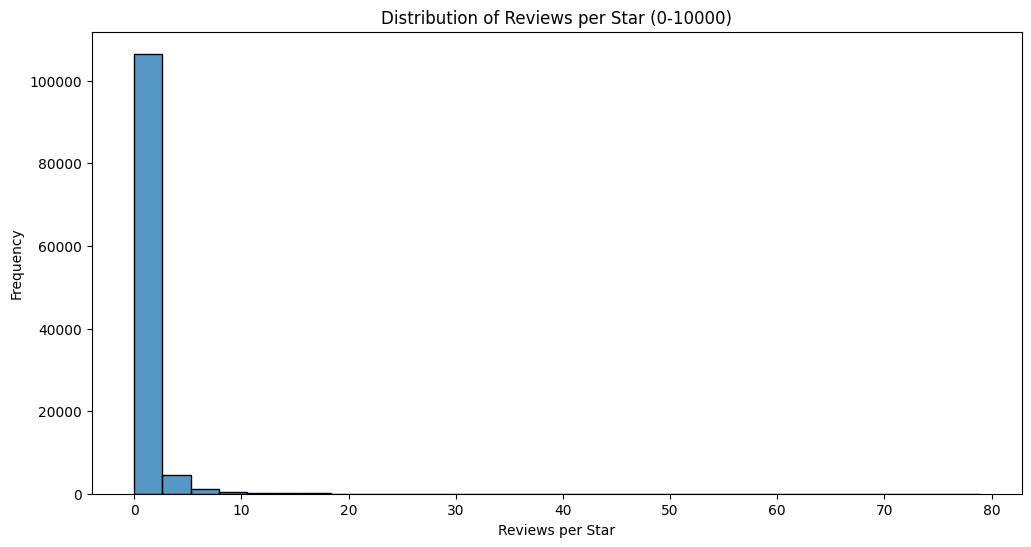

In [ ]:
# @title Distribution reviews per stars
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['reviews_per_star'].between(0, 80)], x='reviews_per_star', bins=30, kde=False)
plt.title('Distribution of Reviews per Star (0-10000)')
plt.xlabel('Reviews per Star')
plt.ylabel('Frequency')
plt.show()

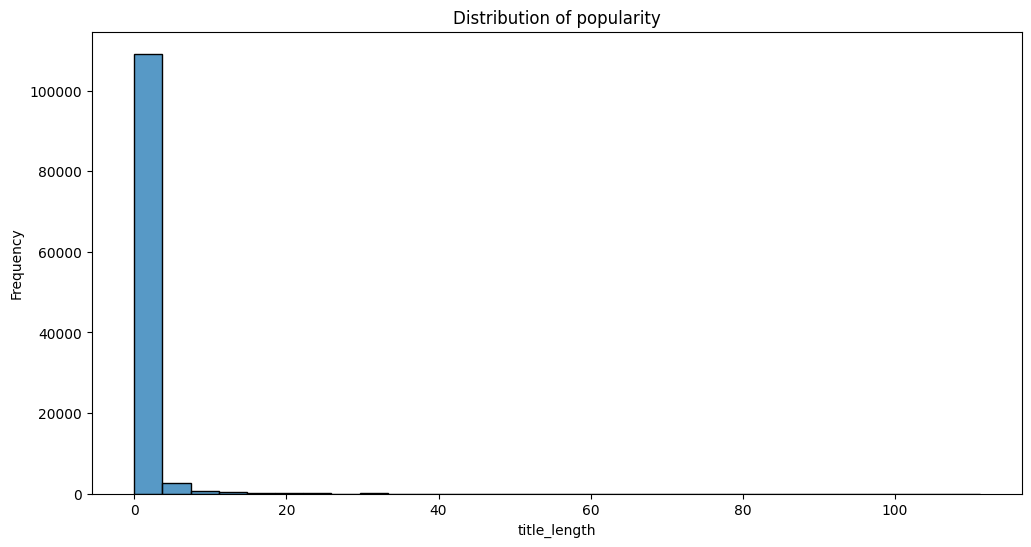

In [ ]:
# @title Distribution popularity
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['popularity'].between(0, 3000)], x='popularity', bins=30, kde=False)
plt.title('Distribution of popularity')
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.show()

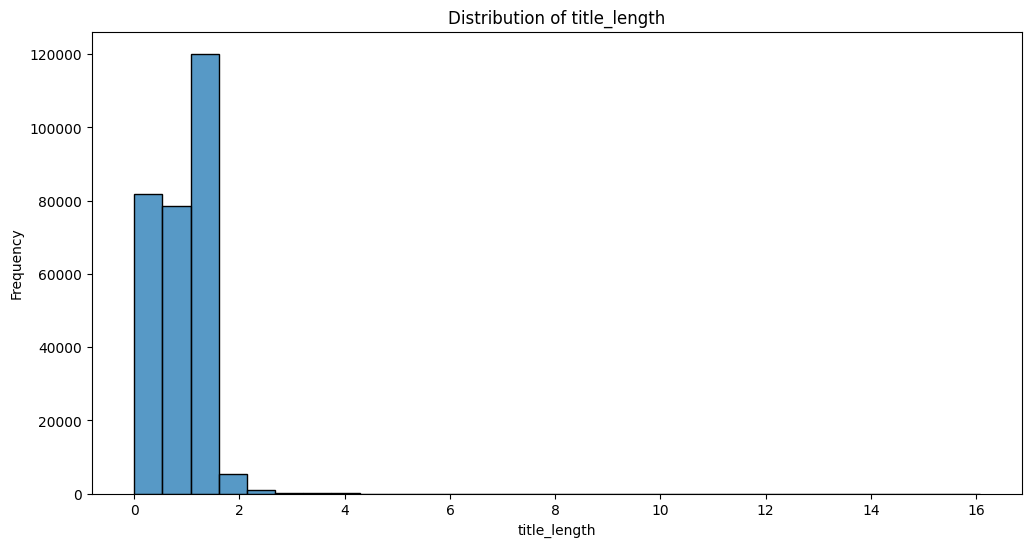

In [ ]:
# @title Distribution title_length
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame from the previous code
plt.figure(figsize=(12, 6))
sns.histplot(data=data[data['title_length'].between(0, 300)], x='title_length', bins=30, kde=False)
plt.title('Distribution of title_length')
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.show()

## Model -> Content Based Filtering

In [ ]:
# @title 1 - Content Based on BERT SentenceTransformer

data['content'] = data['title'] + ' ' + data['categoryName']

model_stbert = SentenceTransformer('all-MiniLM-L6-v2', device=device) # removed all-mpnet-base-v2, and used MiniLM, much faster  #all-MiniLM-L6-v2
model_stbert.half()  # Convert parameters to FP16, reduce memory usage on GPU

titles = data['content'].tolist()
batch_size_bert = 524_288 #very high batch value, likely bc data['content'] is relatively small
title_dataloader = DataLoader(titles, batch_size=batch_size_bert, shuffle=False)

# Generate embeddings in batches
title_embeddings = []
for batch in title_dataloader:
    # batch is a list of strings
    with torch.no_grad():
        embeddings = model_stbert.encode(
            batch,
            convert_to_tensor=True,
            show_progress_bar=True
        )
    # Move to CPU and convert to numpy to avoid holding everything in GPU memory
    title_embeddings.append(embeddings.cpu().numpy())

# Concatenate all batch arrays
title_embeddings = np.vstack(title_embeddings)   # Shape: [N, 768] for all-mpnet-base-v2 or shape [N, 384] for all-MiniLM-L6-v2

#######################################################
print("Applies SVD using PyTorch")
n_components = 200
# Convert embeddings to PyTorch tensor and move to GPU
title_embeddings_tensor = torch.tensor(title_embeddings, device="cuda", dtype=torch.float32)
# Perform SVD
U, S, V = torch.linalg.svd(title_embeddings_tensor, full_matrices=False)
# Reduce dimensionality to n_components components
U_reduced = U[:, :n_components] @ torch.diag(S[:n_components])
# Move reduced embeddings back to CPU if needed
reduced_embeddings = U_reduced.cpu().numpy()
print("SVD complete!")
#######################################################

# # --- Look for Optimal n component ---
# svd_variance = 0.7
# cumulative_variance = svd.explained_variance_ratio_.cumsum()
# optimal_components = (cumulative_variance >= svd_variance).argmax() + 1
# print(f"Optimal number of components for {100*svd_variance}% variance: {optimal_components}")
# svd = TruncatedSVD(n_components=optimal_components)  # Reduction to [N, n_components] dims
# reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix) # Shape [N, n_components]

# -- Converts to Float32 for FAISS ---
print("Converts to Float32 for FAISS")
reduced_embeddings = reduced_embeddings.astype(np.float32)

# print("Explained variance ratio:", svd.explained_variance_ratio_)
# Calculate the mean of the title embeddings
embedding_mean = title_embeddings.mean()
print("Mean of embeddings:", embedding_mean)
# print("Total explained variance:", svd.explained_variance_ratio_.sum()) # Todo: re-assess that
print("reduced_embeddings shape:", reduced_embeddings.shape)

# L2-normalize the n_components-dim embeddings
# l2 is the equivalent of cosine similarity, equivalent of NearestNeighbors(metric="cosine")
reduced_embeddings = normalize(reduced_embeddings, norm='l2', axis=1)

d = reduced_embeddings.shape[1]  # shape of n_components=50
res = faiss.StandardGpuResources()  # Use a single GPU

index_flat = faiss.IndexFlatIP(d)   # CPU index for inner product
index = faiss.index_cpu_to_gpu(res, 0, index_flat)  # 0 = GPU device id

# Add all vectors
index.add(reduced_embeddings)  # shape [N, d], float32
top_10 = 10 # number of closest neighbors we want to keep. We have already calculated the embedding space
distances_content, indices_content = index.search(reduced_embeddings, top_10)
# distances_content and indices_content -> both shape: [N, k]

print("distances_content shape:", distances_content.shape)
print("indices_content shape:", indices_content.shape)

# Sanity check example for the first item
print("Item 0 neighbors:", indices_content[0])
print("Item 0 indices_content (IP ~ Cosine):", distances_content[0])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7221 [00:00<?, ?it/s]

Applies SVD using PyTorch
SVD complete!
Converts to Float32 for FAISS
Mean of embeddings: -3.4e-06
reduced_embeddings shape: (231046, 200)
distances_content shape: (231046, 10)
indices_content shape: (231046, 10)
Item 0 neighbors: [     0  87142  78970  16643 173051 186225   4960 167979  36543   9010]
Item 0 indices_content (IP ~ Cosine): [0.9999998  0.8226327  0.81771934 0.80993366 0.79757756 0.788669
 0.78758144 0.77935284 0.7700748  0.76688725]


In [ ]:
# @title 2 - Content Based TfidfVectorizer

# --- Combine text fields for a richer representation ---
data['content'] = data['title'] + ' ' + data['categoryName']

# --- Vectorize Content using TF-IDF ---
tfidf = TfidfVectorizer(
    sublinear_tf=True, # Sublinear is for when repetitive words like "good", "great" or content varies in length (short vs long descriptions)
    ngram_range=(1, 2), # Ngrams Includes both unigrams (single words) and bigrams (two-word sequences) -> "high", "quality" vs "high quality"
    max_features=2000, # limit the number of words
    max_df=0.3 # limits the number of repetitive words within text to save memory and limit imbalance. Terms appearing more than 30% are excluded
)
tfidf_matrix = tfidf.fit_transform(data['content'])  # shape: [N, max_features] here max_features = 2000

# Convert to CSR (if not already)
tfidf_matrix = csr_matrix(tfidf_matrix)

# # SVD reduction
# svd = TruncatedSVD(n_components=800)  # Reduction to [N, n_components] dims
# svd.fit(tfidf_matrix) # Shape [N, n_components]

# # --- Look for Optimal n component ---
# svd_variance = 0.6
# cumulative_variance = svd.explained_variance_ratio_.cumsum()
# optimal_components = (cumulative_variance >= svd_variance).argmax() + 1
# print(f"Optimal number of components for {100*svd_variance}% variance: {optimal_components}")
# svd = TruncatedSVD(n_components=optimal_components)  # Reduction to [N, n_components] dims
# reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix) # Shape [N, n_components]

#######################################################
print("Applies SVD using PyTorch")
# Convert embeddings to PyTorch tensor and move to GPU
title_embeddings_tensor = torch.tensor(title_embeddings, device="cuda", dtype=torch.float32)
# Perform SVD
U, S, V = torch.linalg.svd(title_embeddings_tensor, full_matrices=False)
# Reduce dimensionality to 300 components
U_reduced = U[:, :300] @ torch.diag(S[:300])
# Move reduced embeddings back to CPU if needed
reduced_embeddings = U_reduced.cpu().numpy()
print("SVD complete!")
#######################################################

# Convert to float32 (Faiss requires float32)
reduced_tfidf_matrix = reduced_tfidf_matrix.astype(np.float32)

# # print("Explained variance ratio:", svd.explained_variance_ratio_)
# # Calculate the mean of the title embeddings
# embedding_mean = reduced_tfidf_matrix.mean()
# print("Mean of embeddings:", embedding_mean)
# print("Total explained variance:", svd.explained_variance_ratio_.sum())
print("reduced_tfidf_matrix shape:", reduced_tfidf_matrix.shape)

# L2-normalize the n_components-dim embeddings
reduced_embeddings = normalize(reduced_tfidf_matrix, norm='l2', axis=1)
d = reduced_embeddings.shape[1]  # Should be equal to n_components
res = faiss.StandardGpuResources()  # Use a single GPU

index_flat = faiss.IndexFlatIP(d)   # CPU index
index = faiss.index_cpu_to_gpu(res, 0, index_flat)  # 0 = GPU device id

# Add all vectors
index.add(reduced_embeddings)  # shape [N, d], float32 bc of FAISS

top_10 = 10 # number of closest neighbors we want to keep.
distances_content, indices_content = index.search(reduced_embeddings, top_10)
# distances and indices both shape: [N, k]

print("distances_content shape:", distances_content.shape)
print("indices_content shape:", indices_content.shape)

# Example for the first item
print("Item 0 neighbors:", indices_content[0])
print("Item 0 indices_content (IP ~ Cosine):", distances_content[0])


Optimal number of components for 60.0% variance: 377
Mean of embeddings: 0.00016750356
Total explained variance: 0.5974361566938433
reduced_tfidf_matrix shape: (607650, 377)
distances_content shape: (607650, 10)
indices_content shape: (607650, 10)
Item 0 neighbors: [     0 281411  82895 173903  18561 349582 408367 314331 465110 566831]
Item 0 indices_content (IP ~ Cosine): [1.         0.9882803  0.97354347 0.96998924 0.9543094  0.9543094
 0.9543094  0.9543094  0.95412093 0.9520006 ]


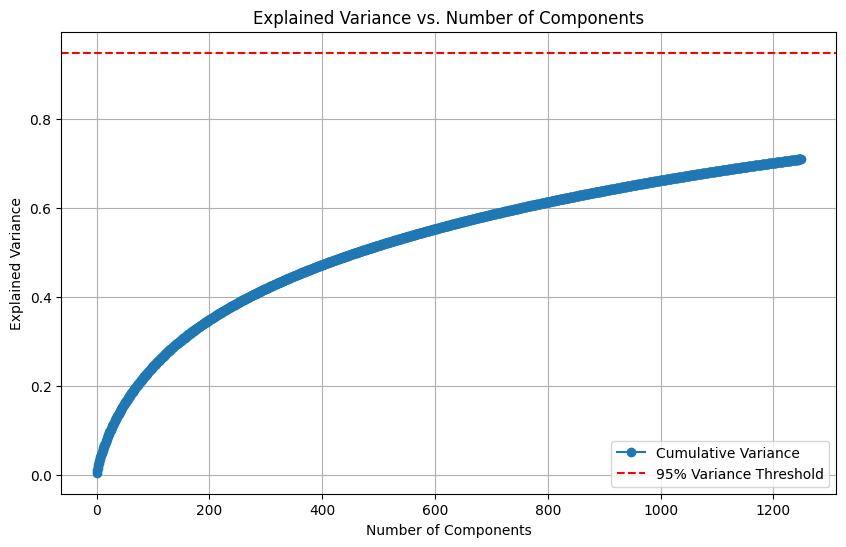

In [ ]:
# @title Plot SVD
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', label="Cumulative Variance")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.legend()
plt.grid()
plt.show()


## Models Collaborative

In [ ]:
# @title DBSCAN
import cudf
from cuml.cluster import DBSCAN
from cuml.metrics import pairwise_distances
import numpy as np
import time

start_time = time.time()
######################################################
# # Convert to a cuDF DataFrame for GPU processing
numerical_features = ['price', 'listPrice', 'reviews', 'stars', 'boughtInLastMonth', 'category_encoded']# 'discount_percentage', 'high_rated', 'title_length', 'discount_and_stars', 'discount_and_reviews'
# item_embeddings_cudf = cudf.DataFrame(reduced_embeddings)
# --- 1. Data Loading and Preprocessing ---
bert_emb_cudf = cudf.DataFrame(reduced_embeddings)

# --- Binary Feature ---
isBestSeller_tensor = data['isBestSeller']
isBestSeller_tensor = cudf.Series(isBestSeller_tensor)

# --- Numerical Feature ---
numerical_features_tensor = data[numerical_features]
numerical_features_tensor = cudf.DataFrame(numerical_features_tensor)

# --- Combine all features ---
item_features = cudf.concat([bert_emb_cudf,numerical_features_tensor,  isBestSeller_tensor], axis=1)
######################################################
print(item_features)
# DBSCAN
dbscan = DBSCAN(
    eps=0.08,           # Radius for density-based clustering
    min_samples=1,      # Minimum points to form a dense cluster
    metric='cosine',    #'euclidean', 'cosine'
    verbose = 1
)

# Fit DBSCAN to item embeddings
labels = dbscan.fit_predict(item_features)

# Convert the cluster labels back to NumPy
labels_np = labels.to_numpy()

# Remove items with label -1
filtered_labels = [label for label in labels_np if label != -1]

# Interpret Results
# Each unique label corresponds to a cluster; -1 indicates noise
clusters = {label: [] for label in set(filtered_labels)}
for idx, label in enumerate(labels_np):
    clusters[label].append(idx)

import collections
cluster_counts = collections.Counter(filtered_labels)
print(f"Number of clusters: {len(cluster_counts) - (-1 in cluster_counts)}")
print(f"Cluster sizes: {cluster_counts}")

end_time = time.time()
print(f"Time: {end_time - start_time:.2f}s")

               0         1         2         3         4         5         6  \
0       0.447441 -0.214543  0.059555 -0.100503 -0.187771 -0.171418  0.073310   
1       0.437602  0.504303 -0.198181  0.160852 -0.045716  0.089295  0.003959   
2       0.313064 -0.131181 -0.179541  0.082877 -0.024440 -0.199166 -0.183985   
3       0.222761 -0.098251 -0.210358  0.038253  0.276371  0.122402 -0.065013   
4       0.509306 -0.280257 -0.098181 -0.152980  0.449684  0.074090  0.045996   
...          ...       ...       ...       ...       ...       ...       ...   
231041  0.373877  0.417635 -0.112715  0.223495 -0.068756 -0.156955 -0.048865   
231042  0.558157 -0.180458  0.229415 -0.059830  0.293951 -0.097310 -0.007024   
231043  0.280074 -0.139964  0.364089  0.194393 -0.091755 -0.036741 -0.193744   
231044  0.174101 -0.079826 -0.107815 -0.055400  0.331057  0.085285 -0.095824   
231045  0.465075 -0.060283 -0.057436  0.114028  0.104949 -0.052687 -0.114210   

               7         8         9  .

In [ ]:
# Assuming 'labels_np' contains the cluster assignments and 'data' is your DataFrame
filtered_labels = [label for label in labels_np if label != -1]

cluster_counts = collections.Counter(filtered_labels)
print(f"Number of clusters: {len(cluster_counts)}")
print(f"Cluster sizes: {cluster_counts}")

Number of clusters: 213088
Cluster sizes: Counter({19: 60423, 4: 3015, 57: 2094, 21: 1697, 261: 1624, 168: 872, 288: 698, 61: 693, 114: 666, 800: 642, 100: 634, 1100: 624, 348: 600, 551: 570, 240: 445, 276: 426, 27: 397, 885: 397, 2381: 376, 674: 345, 1016: 337, 2351: 332, 440: 318, 1820: 315, 1206: 311, 136: 309, 119: 288, 26: 272, 691: 269, 23: 267, 14: 265, 1068: 254, 1600: 253, 0: 242, 2840: 242, 1062: 227, 155: 222, 509: 221, 813: 221, 594: 220, 1851: 205, 173: 201, 1589: 200, 193: 199, 165: 198, 2095: 196, 343: 192, 460: 191, 741: 181, 387: 177, 2092: 177, 2773: 174, 203: 169, 213: 168, 4875: 168, 377: 167, 6331: 165, 1938: 163, 1065: 158, 333: 153, 686: 152, 896: 147, 65: 145, 848: 141, 535: 137, 671: 137, 1446: 126, 3073: 124, 1895: 123, 2898: 123, 347: 119, 6851: 117, 1717: 115, 901: 111, 1676: 111, 3932: 111, 7199: 111, 3486: 108, 1891: 107, 172: 106, 2122: 106, 2997: 106, 3250: 106, 2508: 102, 7571: 101, 5159: 99, 1582: 98, 6925: 98, 3344: 97, 4146: 97, 4552: 96, 7969: 96, 5

In [ ]:
for i in range(5):  # Test 5 random products
    random_item_index = random.randint(0, len(filtered_labels) - 1)
    collab_recs = filtered_labels[random_item_index]
    print(f"Recommendations for item {random_item_index}: {collab_recs}")

Recommendations for item 169479: 105529
Recommendations for item 64235: 4875
Recommendations for item 159253: 99838
Recommendations for item 228468: 137721
Recommendations for item 270186: 159717


In [ ]:
import cudf
import cupy as cp

# @title First approach + batches
def get_collab_indices_cudf(labels, item_features, top_n=10, max_batch_size=256):
    """
    Generate collaborative indices with GPU acceleration using sub-batching to handle large clusters.

    Args:
        labels: Cluster labels from DBSCAN (cuDF Series or NumPy array of shape [N]).
        item_features: cuDF DataFrame of item features used for clustering (shape [N, d]).
        top_n: Number of recommendations to generate for each item.
        max_batch_size: Maximum number of items to process per sub-batch.

    Returns:
        indices_colab: A matrix of recommended indices (shape [N, k]).
    """
    ct=0
    if isinstance(labels, np.ndarray):
        labels = cudf.Series(labels)

    item_features_cupy = cp.asarray(item_features.values)
    valid_indices = labels.index[labels != -1].to_cupy()
    labels_cupy = cp.asarray(labels.values)

    indices_colab = cp.full((len(labels), top_n), -1, dtype=cp.int32)
    unique_clusters = cp.unique(labels_cupy[labels_cupy != -1])

    for cluster in unique_clusters:
        ct+=1
        if ct % 5000 == 0:
            print(ct)
        cluster_indices = cp.where(labels_cupy == cluster)[0]
        cluster_embeddings = item_features_cupy[cluster_indices]

        # Sub-batch for pairwise computation
        n_cluster = len(cluster_indices)
        if n_cluster > max_batch_size:
            sub_batch_indices = cp.arange(0, n_cluster, max_batch_size)
            for start_idx in sub_batch_indices:
                end_idx = min(start_idx + max_batch_size, n_cluster)
                sub_batch_embeddings = cluster_embeddings[start_idx:end_idx]

                # Compute pairwise cosine similarity for sub-batch
                cosine_similarities = sub_batch_embeddings @ cluster_embeddings.T
                cp.fill_diagonal(cosine_similarities, -cp.inf)
                sorted_indices = cp.argsort(-cosine_similarities, axis=1)[:, :top_n]
                top_n_global_indices = cluster_indices[sorted_indices]

                # Save results
                for i, idx in enumerate(cluster_indices[start_idx:end_idx]):
                    indices_colab[idx, :len(top_n_global_indices[i])] = top_n_global_indices[i]
        else:
            cosine_similarities = cluster_embeddings @ cluster_embeddings.T
            cp.fill_diagonal(cosine_similarities, -cp.inf)
            sorted_indices = cp.argsort(-cosine_similarities, axis=1)[:, :top_n]
            top_n_global_indices = cluster_indices[sorted_indices]

            for i, idx in enumerate(cluster_indices):
                indices_colab[idx, :len(top_n_global_indices[i])] = top_n_global_indices[i]

    return indices_colab.get()

# Convert item_features and labels to cuDF for GPU processing
item_features_cudf = cudf.DataFrame(item_features)  # Assume item_features is a NumPy array or Pandas DataFrame
labels_cudf = cudf.Series(filtered_labels)  # Assume labels_np is a NumPy array

# Generate collaborative indices using the GPU-accelerated function
top_n = 10
indices_colab = get_collab_indices_cudf(labels_cudf, item_features_cudf, top_n=top_n)

# Check the shape and example recommendations
print("Shape of indices_colab:", indices_colab.shape)
print("Example recommendations for item 0:", indices_colab[0])

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
Shape of indices_colab: (231046, 10)
Example recommendations for item 0: [176155 167979 173051   1493 164145 208211 114045 198238 105832  42162]


In [ ]:
torch.cuda.empty_cache()

## Hybrid model: Combining Content Based and Collaborative Based filtering

In [ ]:
# @title Hybrid Recommendations
import random

# --- Function to Generate Collaborative Recommendations Using DBSCAN ---
def get_collab_recommendations_dbscan(item_index, labels, top_n=10):
    """
    Get collaborative recommendations using DBSCAN clusters.

    Args:
        item_index: Index of the selected product.
        labels: Cluster labels from DBSCAN.
        top_n: Number of recommendations to return.

    Returns:
        List of recommended indices within the same cluster.
    """
    item_cluster = labels[item_index]  # Get the cluster label of the selected item
    if item_cluster == -1:
        # If the item is noise, return an empty list
        return []

    # Get all items in the same cluster
    cluster_items = [idx for idx, label in enumerate(labels) if label == item_cluster]

    # Exclude the selected item itself
    cluster_items = [idx for idx in cluster_items if idx != item_index]

    # Return top_n items from the cluster (or fewer if the cluster is small)
    return cluster_items[:top_n]


# --- Updated Hybrid Recommendation Function ---
def get_hybrid_recommendations(item_index, content_indices, labels, content_weight=0.5, top_n=10):
    """
    Combines content-based and collaborative filtering recommendations using DBSCAN.

    Args:
        item_index: Index of the item for which to generate recommendations.
        content_indices: Matrix of content-based recommendation indices (from KNN).
        labels: Cluster labels from DBSCAN for collaborative filtering.
        content_weight: Weight given to content-based recommendations (between 0 and 1).
        top_n: Number of recommendations to return.

    Returns:
        A list of hybrid recommendation indices and scores.
    """
    # Get content-based recommendations
    content_recs = content_indices[item_index][:top_n]

    # Get collaborative recommendations using DBSCAN
    collab_recs = get_collab_recommendations_dbscan(item_index, labels, top_n=top_n)

    # Combine recommendations into a single dictionary for scoring
    hybrid_scores = {}
    content_scores = {}
    collab_scores = {}

    # Score content-based recommendations
    for i, rec_index in enumerate(content_recs):
        score = content_weight * (top_n - i)
        content_scores[rec_index] = score
        hybrid_scores[rec_index] = hybrid_scores.get(rec_index, 0.0) + score

    # Score collaborative recommendations
    for i, rec_index in enumerate(collab_recs):
        score = (1 - content_weight) * (top_n - i)
        collab_scores[rec_index] = score
        hybrid_scores[rec_index] = hybrid_scores.get(rec_index, 0.0) + score

    # Sort recommendations by combined scores
    sorted_hybrid_recs = sorted(
        hybrid_scores.items(),
        key=lambda x: x[1],
        reverse=True
    )

    # Extract top_n recommendations and their scores
    recommended_indices = [item[0] for item in sorted_hybrid_recs[:top_n]]
    recommended_scores = [item[1] for item in sorted_hybrid_recs[:top_n]]

    content_only_scores = [content_scores.get(idx, 0.0) for idx in recommended_indices]
    collab_only_scores = [collab_scores.get(idx, 0.0) for idx in recommended_indices]

    return recommended_indices, recommended_scores, content_only_scores, collab_only_scores


# --- Example Usage ---
top_n = 10
random_item_index = random.randint(0, len(data) - 1)
####
# --- Create a DataFrame with product info and recommendations ---
random_product_id = data['asin'].iloc[random_item_index]  # Get ASIN for the item_index
product_info = data[data['asin'] == random_product_id]
print("Randomly Selected asin: \n", product_info[['asin', 'title', 'categoryName']].values)
####
# Call the updated hybrid function
hybrid_recommendations_indices, hybrid_recommendations_scores, content_scores, collab_scores = get_hybrid_recommendations(
    random_item_index, indices_content, labels_np, content_weight=0.75, top_n=top_n
)

# Map recommendations to ASINs
hybrid_recommendations_asins = data['asin'].iloc[hybrid_recommendations_indices].tolist()

# Generate a DataFrame of recommendations
recommendations_df = pd.DataFrame({
    'asin': hybrid_recommendations_asins,
    'total_score': hybrid_recommendations_scores,
    'content_score': content_scores,
    'collab_score': collab_scores
})

# Merge with original data for additional attributes
recommendations_df = pd.merge(recommendations_df, data, on='asin', how='left')

# Print recommendations
print("\nRecommendations:\n", recommendations_df[['asin', 'title', 'categoryName', 'total_score', 'content_score', 'collab_score']])
recommendations_df[['asin', 'title', 'categoryName', 'total_score', 'content_score', 'collab_score']]

Randomly Selected asin: 
 [['B08ZCCSBHJ'
  'moswag usb printer cable 10ft/3meter scanner cable usb printer cord type a to type b durable usb 2.0 scanner cord high speed for hp,canon,dell,epson,lexmark,xerox,brother,samsung and more'
  'televisions video']]

Recommendations:
          asin                                              title  \
0  B08ZCCSBHJ  moswag usb printer cable 10ft/3meter scanner c...   
1  B09PFP32TR  moswag printer cable scanner cable usb printer...   
2  B09NVP2Q6N  printer cable 20ft, sweguard usb printer cord ...   
3  B08TSWTGTG  printer cable 30ft，usb printer cord 2.0 type a...   
4  B08G1X2C48  printer cable 6.6ft/2m, jsaux usb 2.0 type a m...   
5  B08TV2NCXT  printer cable 12ft，usb printer cord 2.0 type a...   
6  B08TTCPQWS  printer cable 15ft，usb printer cord 2.0 type a...   
7  B088GFBM1L  upgrow usb c hub 7-1 multiport adapter portabl...   
8  B07RW66XRW  jsaux printer cable, 10ft/3m usb 2.0 type a to...   
9  B0C5WJ4WWC  hancenda usb c multi charging

asin                                              title  \
0  B08ZCCSBHJ  moswag usb printer cable 10ft/3meter scanner c...   
1  B09PFP32TR  moswag printer cable scanner cable usb printer...   
2  B09NVP2Q6N  printer cable 20ft, sweguard usb printer cord ...   
3  B08TSWTGTG  printer cable 30ft，usb printer cord 2.0 type a...   
4  B08G1X2C48  printer cable 6.6ft/2m, jsaux usb 2.0 type a m...   
5  B08TV2NCXT  printer cable 12ft，usb printer cord 2.0 type a...   
6  B08TTCPQWS  printer cable 15ft，usb printer cord 2.0 type a...   
7  B088GFBM1L  upgrow usb c hub 7-1 multiport adapter portabl...   
8  B07RW66XRW  jsaux printer cable, 10ft/3m usb 2.0 type a to...   
9  B0C5WJ4WWC  hancenda usb c multi charging cable 2pack, 6 i...   

            categoryName  total_score  content_score  collab_score  
0      televisions video         7.50           7.50          0.00  
1     cables accessories         6.75           6.75          0.00  
2         tv accessories         6.00           6.00          0.00  
3     cables accessories         5.25           5.25          0.00  
4      televisions video         4.50           4.50          0.00  
5      televisions video         3.75           3.75          0.00  
6      televisions video         3.00           3.00          0.00  
7               usb hubs         2.50           0.00          2.50  
8  industrial scientific         2.25           2.25          0.00  
9      televisions video         2.25           0.00          2.25

In [ ]:
# @title Content-Based Recommendations Only
print("\nDataFrame for Content-Based Recommendations ONLY:")

# --- Extract Content-Based Recommendations ---
content_recommendations_df = pd.DataFrame({
    'asin': data['asin'].iloc[indices_content[random_item_index]].tolist(),
    'content_score': content_scores,
    'collab_score': [0] * len(content_scores),  # No collaboration score for content-only
    'total_score': content_scores,             # Total score is the content score for content-only
})

# --- Merge with Original Data for Additional Attributes ---
content_recommendations_df = pd.merge(content_recommendations_df, data, on='asin', how='left')

# --- De-Standardize Numerical Features ---
output_content_recommendations_df = content_recommendations_df.copy()
for feature in numerical_features:
    mean = scaler.mean_[numerical_features.index(feature)]
    scale = scaler.scale_[numerical_features.index(feature)]
    output_content_recommendations_df[feature] = (
        output_content_recommendations_df[feature] * scale + mean
    )

# --- Output the Recommendations ---
output_content_recommendations_df = output_content_recommendations_df[[
    'asin', 'title', 'stars', 'reviews', 'price', 'listPrice', 'categoryName',
    'isBestSeller', 'boughtInLastMonth', 'total_score', 'content_score', 'collab_score'
]]

output_content_recommendations_df



DataFrame for Content-Based Recommendations ONLY:


asin                                              title  stars  \
0  B08ZCCSBHJ  moswag usb printer cable 10ft/3meter scanner c...    4.6   
1  B09PFP32TR  moswag printer cable scanner cable usb printer...    4.6   
2  B09NVP2Q6N  printer cable 20ft, sweguard usb printer cord ...    4.5   
3  B08TSWTGTG  printer cable 30ft，usb printer cord 2.0 type a...    4.4   
4  B08G1X2C48  printer cable 6.6ft/2m, jsaux usb 2.0 type a m...    4.6   
5  B08TV2NCXT  printer cable 12ft，usb printer cord 2.0 type a...    4.4   
6  B08TTCPQWS  printer cable 15ft，usb printer cord 2.0 type a...    4.4   
7  B07RW66XRW  jsaux printer cable, 10ft/3m usb 2.0 type a to...    4.6   
8  B08KY32VWK  printer cable 15 ft, usb printer cable high sp...    4.7   
9  B086MLWWRD  printer cable 25 feet, usb 2.0 type a male to ...    4.6   

   reviews  price  listPrice           categoryName  isBestSeller  \
0   1766.0   6.99        0.0      televisions video         False   
1   1765.0   6.99        0.0     cables accessories         False   
2    146.0  15.99        0.0         tv accessories         False   
3    124.0   6.59        0.0     cables accessories         False   
4   5086.0  12.99        0.0      televisions video         False   
5    124.0   6.59        0.0      televisions video         False   
6    124.0   6.59        0.0      televisions video         False   
7  15794.0  15.99        0.0  industrial scientific         False   
8    520.0  11.55        0.0     cables accessories         False   
9    737.0   9.99        0.0      televisions video         False   

   boughtInLastMonth  total_score  content_score  collab_score  
0                0.0         7.50           7.50             0  
1                0.0         6.75           6.75             0  
2                0.0         6.00           6.00             0  
3                0.0         5.25           5.25             0  
4                0.0         4.50           4.50             0  
5                0.0         3.75           3.75             0  
6                0.0         3.00           3.00             0  
7                0.0         0.00           0.00             0  
8                0.0         2.25           2.25             0  
9                0.0         0.00           0.00             0

In [ ]:
# @title Collaborative-Based Recommendations Only with Selected Product
print("\nDataFrame for Collaborative-Based Recommendations ONLY:")

# --- Generate Collaborative Recommendations ---
collab_recommendations_indices = get_collab_recommendations_dbscan(random_item_index, labels_np, top_n=top_n)

# --- Build Collaborative Recommendations DataFrame ---
collab_recommendations_df = pd.DataFrame({
    'asin': data['asin'].iloc[collab_recommendations_indices].tolist(),
    'content_score': [0] * len(collab_recommendations_indices),  # No content score for collaborative-only
    'collab_score': [(1 - (i / len(collab_recommendations_indices))) for i in range(len(collab_recommendations_indices))],
    'total_score': [(1 - (i / len(collab_recommendations_indices))) for i in range(len(collab_recommendations_indices))],
})

# --- Merge with Original Data for Additional Attributes ---
collab_recommendations_df = pd.merge(collab_recommendations_df, data, on='asin', how='left')

# --- De-Standardize Numerical Features ---
output_collab_recommendations_df = collab_recommendations_df.copy()
for feature in numerical_features:
    mean = scaler.mean_[numerical_features.index(feature)]
    scale = scaler.scale_[numerical_features.index(feature)]
    output_collab_recommendations_df[feature] = (
        output_collab_recommendations_df[feature] * scale + mean
    )

# --- Include the Selected Product at the Top ---
selected_product = data.iloc[[random_item_index]].copy()  # Get the selected product details
selected_product['content_score'] = 0  # Add content_score for consistency
selected_product['collab_score'] = 0   # Add collab_score for consistency
selected_product['total_score'] = 0   # Add total_score for consistency

# Add selected product as the first row
output_collab_recommendations_df = pd.concat([selected_product, output_collab_recommendations_df], ignore_index=True)

# --- Output the Recommendations ---
output_collab_recommendations_df = output_collab_recommendations_df[[
    'asin', 'title', 'stars', 'reviews', 'price', 'listPrice', 'categoryName',
    'isBestSeller', 'boughtInLastMonth', 'total_score', 'content_score', 'collab_score'
]]

output_collab_recommendations_df



DataFrame for Collaborative-Based Recommendations ONLY:


asin                                              title     stars  \
0   B08ZCCSBHJ  moswag usb printer cable 10ft/3meter scanner c...  0.739336   
1   B088GFBM1L  upgrow usb c hub 7-1 multiport adapter portabl...  4.500000   
2   B0C5WJ4WWC  hancenda usb c multi charging cable 2pack, 6 i...  4.000000   
3   B089W2QRH8  fasgear usb to usb cable 1.6ft – nylon braided...  4.600000   
4   B07Q6YS7W2  usb c hub 8 in 1, uni usb-c hub with a removab...  4.400000   
5   B081DYD25S  powered usb hub, rosonway aluminum 10 port usb...  4.500000   
6   B098L6MZG9  usb splitter cable mogood usb y splitter adapt...  4.500000   
7   B0BVBHXMCJ  raoyi usb hub 6-port usb hub 3.0 splitter 24w ...  4.500000   
8   B085XW4V4D  xbohjoe usb printer cable usb 2.0 type a male ...  4.700000   
9   B07DCPVG4Q  fasgear 5m usb c to usb b cable nylon braided ...  4.700000   
10  B09C5BDBKG  xyyzyz usb c to usb c cable [ 6.6 ft 2 pack ] ...  4.500000   

        reviews       price  listPrice       categoryName  isBestSeller  \
0     -0.010366   -0.394069  -0.189849  televisions video         False   
1   3119.000000   48.390000   0.000000           usb hubs         False   
2    945.000000   13.990000   0.000000  televisions video         False   
3    678.000000    9.690000   0.000000     tv accessories         False   
4    254.000000  128.860000   0.000000           usb hubs         False   
5   1062.000000  100.830000   0.000000           usb hubs         False   
6   1448.000000   17.990000   0.000000           usb hubs         False   
7    112.000000   26.990000  29.990000           usb hubs         False   
8    443.000000   13.990000   0.000000  televisions video         False   
9   3264.000000   14.990000   0.000000  televisions video         False   
10  1853.000000   13.990000   0.000000  televisions video         False   

    boughtInLastMonth  total_score  content_score  collab_score  
0           -0.162547          0.0              0           0.0  
1            0.000000          1.0              0           1.0  
2            0.000000          0.9              0           0.9  
3            0.000000          0.8              0           0.8  
4            0.000000          0.7              0           0.7  
5            0.000000          0.6              0           0.6  
6            0.000000          0.5              0           0.5  
7            0.000000          0.4              0           0.4  
8            0.000000          0.3              0           0.3  
9            0.000000          0.2              0           0.2  
10          50.000000          0.1              0           0.1

## Evaluation Metrics

In [ ]:
# @title Coverage and Diversity metrics

def coverage_score(indices_matrix, full_data_size):
    """
    Percentage of unique items that appear in any top-k list across all items.

    Args:
        indices_matrix: 2D array of recommended item indices, shape [N, k].
        full_data_size: Total number of unique items in the dataset.

    Returns:
        Coverage score as a float between 0 and 1.
    """
    # Flatten and remove invalid indices (e.g., -1)
    recommended_items = set(indices_matrix.flatten())
    recommended_items.discard(-1)  # Remove invalid index used for padding

    # Calculate coverage
    coverage = len(recommended_items) / full_data_size
    return coverage

def average_diversity(indices_matrix, embeddings):
    """
    Measures how dissimilar (on average) the top-k recommended items
    are from each other, across all items. We'll compute the average
    pairwise distance in embedding space for each top-k list, then average
    over all items.
    """
    n_items, k = indices_matrix.shape
    total_diversity = 0.0

    # --- For each item, compute average pairwise distance among the recommended items
    for i in range(n_items):
        recs = indices_matrix[i]
        # --- Extract the embeddings for these recommended items
        rec_vectors = embeddings[recs]  # shape: [k, d]
        if k > 1:
            # Compute pairwise distances: simple approach (L2 or 1 - cosine)
            # Here, we do dot product => if normalized, dot => cos similarity
            # so distance = 1 - cosSimilarity
            # We then do a quick pairwise approach
            sims = rec_vectors @ rec_vectors.T  # shape [k, k]
            # diag = 1.0 for each item with itself, so ignore it
            # Does the upper-tri
            tri_indices = np.triu_indices(k, 1)
            pair_sims = sims[tri_indices]  # similarity
            pair_dists = 1.0 - pair_sims
            avg_dist = pair_dists.mean()
            total_diversity += avg_dist
        else:
            # if k=1, there's only one item => no diversity
            total_diversity += 0.0

    return total_diversity / n_items

# Total number of items in the dataset
full_data_size = len(data)

# Coverage for content-based recommendations
content_coverage = coverage_score(indices_content, full_data_size)
content_diversity = average_diversity(indices_content, reduced_embeddings)
print(f"Content-Based Coverage: {content_coverage:.4f}")
print(f"Content-Based Diversity: {content_diversity:.4f}")

# Coverage for collaborative recommendations
collab_coverage = coverage_score(indices_colab, full_data_size)
collab_diversity = average_diversity(indices_colab, reduced_embeddings)
print(f"Collaborative Coverage: {collab_coverage:.4f}")
print(f"Collaborative Diversity: {collab_diversity:.4f}")

# Coverage for hybrid recommendations
hybrid_recommendations_indices = np.array(hybrid_recommendations_indices).reshape(1, -1)
hybrid_coverage = coverage_score(hybrid_recommendations_indices, full_data_size)
hybrid_diversity = average_diversity(hybrid_recommendations_indices, reduced_embeddings)
print(f"Hybrid Coverage: {hybrid_coverage:.4f}")
print(f"Hybrid Diversity: {hybrid_diversity:.4f}")


Content-Based Coverage: 1.0000
Content-Based Diversity: 0.2436
Collaborative Coverage: 0.8880
Collaborative Diversity: 0.2422
Hybrid Coverage: 0.0000
Hybrid Diversity: 0.2789


In [ ]:
# @title Coverage & Diversity improved
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances  # More efficient distance calculation
import random
import cupy as cp
import numpy as np
# ... (other imports)

# --- Function to Generate Collaborative Recommendations Using DBSCAN ---
# Assume this function is defined elsewhere and remains unchanged
# --- Function to Generate Collaborative Recommendations Using DBSCAN ---
def get_collab_recommendations_dbscan_cupy(item_index, labels_gpu, top_n=10):
    """
    Get collaborative recommendations using DBSCAN clusters on the GPU.

    Args:
        item_index: Index of the selected product (on the CPU).
        labels_gpu: CuPy array of cluster labels from DBSCAN.
        top_n: Number of recommendations to return.

    Returns:
        List of recommended indices within the same cluster (as a CuPy array).
    """
    item_cluster = labels_gpu[item_index]  # Get the cluster label of the selected item
    if item_cluster == -1:
        # If the item is noise, return an empty list
        return cp.array([], dtype=int)

    # Find indices of items in the same cluster (efficiently on GPU)
    cluster_items_gpu = cp.where(labels_gpu == item_cluster)[0]

    # Exclude the selected item itself
    cluster_items_gpu = cluster_items_gpu[cluster_items_gpu != item_index]

    # Return top_n items from the cluster (or fewer if the cluster is small)
    return cluster_items_gpu[:top_n]

def get_hybrid_recommendations_cupy(content_indices_gpu, labels_gpu, content_weight=0.75, top_n=10):
    """
    Combines content-based and collaborative filtering recommendations using DBSCAN on the GPU (vectorized with CuPy).

    Args:
        content_indices_gpu: CuPy array of content-based recommendation indices (from KNN).
        labels_gpu: CuPy array of cluster labels from DBSCAN.
        content_weight: Weight given to content-based recommendations (between 0 and 1).
        top_n: Number of recommendations to return.

    Returns:
        A NumPy array of hybrid recommendation indices (moved back to the CPU).
    """
    n_items = content_indices_gpu.shape[0]

    # 1. Content-based recommendations (fully vectorized on GPU)
    content_recs_gpu = content_indices_gpu[:, :top_n]
    content_scores_gpu = content_weight * (top_n - cp.arange(top_n))
    content_scores_gpu = cp.tile(content_scores_gpu, (n_items, 1))

    # 2. Collaborative recommendations (fully vectorized on GPU)
    collab_recs_list = []
    for i in range(n_items):
        collab_recs_gpu = get_collab_recommendations_dbscan_cupy(i, labels_gpu, top_n=top_n)
        collab_recs_list.append(collab_recs_gpu)

    max_collab_recs = max(len(recs) for recs in collab_recs_list) if collab_recs_list else 0
    collab_recs_gpu = cp.full((n_items, max_collab_recs), -1, dtype=int)
    for i, recs in enumerate(collab_recs_list):
        collab_recs_gpu[i, :len(recs)] = recs

    collab_scores_gpu = (1 - content_weight) * (top_n - cp.arange(max_collab_recs))
    collab_scores_gpu = cp.tile(collab_scores_gpu, (n_items, 1))

    # 3. Combine and sort (partially vectorized on GPU)
    hybrid_indices_gpu = cp.full((n_items, top_n), -1, dtype=int)
    for i in range(n_items):
        combined_scores = {}
        for j in range(top_n):
            rec_index = int(cp.asnumpy(content_recs_gpu[i, j]))
            if rec_index != -1:
                score = float(cp.asnumpy(content_scores_gpu[i, j]))
                combined_scores[rec_index] = combined_scores.get(rec_index, 0) + score

        for j in range(collab_recs_gpu.shape[1]):
            rec_index = int(cp.asnumpy(collab_recs_gpu[i, j]))
            if rec_index != -1:
                score = float(cp.asnumpy(collab_scores_gpu[i, j]))
                combined_scores[rec_index] = combined_scores.get(rec_index, 0) + score

        # Sort and get top_n indices (move to CPU for sorting)
        sorted_indices_cpu = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)[:top_n]
        sorted_indices_gpu = cp.array(sorted_indices_cpu)
        hybrid_indices_gpu[i, :len(sorted_indices_gpu)] = sorted_indices_gpu

    # Move the final result back to the CPU as a NumPy array
    hybrid_indices = cp.asnumpy(hybrid_indices_gpu)
    return hybrid_indices

# --- Coverage and Diversity Metrics ---
def coverage_score_cupy(indices_matrix_gpu, full_data_size):
    """
    Calculates the coverage score on the GPU using CuPy.

    Args:
        indices_matrix_gpu: CuPy array of recommended item indices.
        full_data_size: Total number of unique items in the dataset (on the CPU).

    Returns:
        Coverage score as a float (on the CPU).
    """
    recommended_items_gpu = cp.unique(indices_matrix_gpu.flatten())
    recommended_items_gpu = recommended_items_gpu[recommended_items_gpu != -1]  # Remove padding

    # Move the result back to CPU for the division
    coverage = cp.asnumpy(recommended_items_gpu.size) / full_data_size
    return coverage

def average_diversity_cupy(indices_matrix_gpu, embeddings_gpu):
    """
    Calculates the average diversity on the GPU using CuPy.

    Args:
        indices_matrix_gpu: CuPy array of recommended item indices.
        embeddings_gpu: CuPy array of item embeddings.

    Returns:
        Average diversity as a float (on the CPU).
    """
    n_items, k = indices_matrix_gpu.shape
    total_diversity = cp.array(0.0)  # Use CuPy array for accumulation

    for i in range(n_items):
        recs = indices_matrix_gpu[i]
        valid_recs = recs[recs != -1]  # Consider only valid indices

        if len(valid_recs) > 1:
            rec_vectors = embeddings_gpu[valid_recs]

            # Use CuPy's pairwise_distances for GPU calculation
            # dists = cp.asnumpy(pairwise_distances(rec_vectors, metric='euclidean')) # Move to CPU for compatibility with sklearn
            # dists = cp.array(dists)
            dists = cp.sum((rec_vectors[:, cp.newaxis, :] - rec_vectors)**2, axis=2)**0.5  # Calculate pairwise distances directly in CuPy

            # Get average distance (excluding distance to self)
            avg_dist = dists.sum() / (len(valid_recs) * (len(valid_recs) - 1))
            total_diversity += avg_dist
        else:
            total_diversity += 0.0

    # Move the result back to CPU for the division
    return cp.asnumpy(total_diversity / n_items)

# --- Example Usage and Metric Calculation ---
top_n = 3
###############################################

# 1. Move data to the GPU
content_indices_gpu = cp.array(indices_content)
indices_colab_gpu = cp.array(indices_colab)
# full_data_size_gpu = cp.array(full_data_size)
full_data_size_gpu = cp.array(full_data_size, dtype=cp.int64)
reduced_embeddings_gpu = cp.array(reduced_embeddings)
labels_gpu = cp.array(labels_np)
print("2-")
# 2. Generate hybrid recommendations on the GPU
indices_hybrid_gpu = get_hybrid_recommendations_cupy(content_indices_gpu, labels_gpu, content_weight=0.75, top_n=top_n)
print("3-")
# 3. Move the results back to the CPU if needed
indices_hybrid = cp.asnumpy(indices_hybrid_gpu)
###############################################


# Total number of items in the dataset
full_data_size = len(data)

print("4-")
content_coverage = coverage_score_cupy(content_indices_gpu, full_data_size)
print(f"Collaborative Coverage: {content_coverage:.4f}")
content_diversity = average_diversity_cupy(content_indices_gpu, reduced_embeddings_gpu)
print(f"Collaborative Diversity: {content_diversity:.4f}")

print("5-")
collab_coverage = coverage_score_cupy(indices_colab_gpu, full_data_size)
print(f"Collaborative Coverage: {collab_coverage:.4f}")
collab_diversity = average_diversity_cupy(indices_colab_gpu, reduced_embeddings_gpu)
print(f"Collaborative Diversity: {collab_diversity:.4f}")

print("6-")
# 2. Calculate metrics on the GPU
hybrid_coverage = coverage_score_cupy(indices_hybrid_gpu, full_data_size)
print(f"Hybrid Coverage: {hybrid_coverage:.4f}")
hybrid_diversity = average_diversity_cupy(indices_hybrid_gpu, reduced_embeddings_gpu)
print(f"Hybrid Diversity: {hybrid_diversity:.4f}")


# # --- Example Usage ---

# # Assuming you have your data (indices_hybrid, reduced_embeddings) on the CPU as NumPy arrays

# # 1. Move data to the GPU
# # indices_hybrid_gpu = cp.array(indices_hybrid)
# # reduced_embeddings_gpu = cp.array(reduced_embeddings)
# print("5-")
# # 2. Calculate metrics on the GPU
# hybrid_coverage = coverage_score_cupy(indices_hybrid_gpu, full_data_size)
# print(f"Hybrid Coverage: {hybrid_coverage:.4f}")
# hybrid_diversity = average_diversity_cupy(indices_hybrid_gpu, reduced_embeddings_gpu)
# print(f"Hybrid Diversity: {hybrid_diversity:.4f}")


# # --- Calculate Metrics ---
# content_coverage = coverage_score(indices_content, full_data_size)
# content_diversity = average_diversity(indices_content, reduced_embeddings)
# print(f"Content-Based Coverage: {content_coverage:.4f}")
# print(f"Content-Based Diversity: {content_diversity:.4f}")

# collab_coverage = coverage_score(indices_colab, full_data_size)
# collab_diversity = average_diversity(indices_colab, reduced_embeddings)
# print(f"Collaborative Coverage: {collab_coverage:.4f}")
# print(f"Collaborative Diversity: {collab_diversity:.4f}")

# hybrid_coverage = coverage_score(indices_hybrid, full_data_size)
# hybrid_diversity = average_diversity(indices_hybrid, reduced_embeddings)
# print(f"Hybrid Coverage: {hybrid_coverage:.4f}")
# print(f"Hybrid Diversity: {hybrid_diversity:.4f}")

2-
3-
4-
Collaborative Coverage: 1.0000
Collaborative Diversity: 0.6745
5-
Collaborative Coverage: 0.8880
Collaborative Diversity: 0.3170
6-
Hybrid Coverage: 0.9998
Hybrid Diversity: 0.5648


## Export CSV

In [ ]:
# @title Export CSV with recommendations and scores on Test Dataset

recommendation_results = []
print(len(test_dataset))
# --- Iterate over all items in the dataset
for item_index in range(len(test_dataset)):
    # Get recommendations and scores for the current item
    hybrid_recommendations_indices, hybrid_recommendations_scores = get_hybrid_recommendations(
        item_index,
        indices_content,
        indices_colab,
        content_weight=content_weight,
        top_n=top_n
    )

    # Map the recommended indices to ASINs
    recommended_asins = data['asin'].iloc[hybrid_recommendations_indices].tolist()

    # Append results as a dictionary
    recommendation_results.append({
        'asin': data['asin'].iloc[item_index],
        'recommendations': ', '.join(recommended_asins),
        'scores': ', '.join([f"{score:.4f}" for score in hybrid_recommendations_scores])
    })

# Convert results to a DataFrame
recommendation_df = pd.DataFrame(recommendation_results)

output_file = "/content/drive/Othercomputers/My Laptop/Documents/LT-RecommendationSystem/hybrid_recommendations.csv"
recommendation_df.to_csv(output_file, index=False)
print(f"Exported recommendations with scores to {output_file}")

print("\n END!")

91148
Exported recommendations with scores to /content/drive/Othercomputers/My Laptop/Documents/LT-RecommendationSystem/hybrid_recommendations.csv

 END!
